# Project: Which plan brings in more revenue? 


__Purpose of project__:
Megaline is a company that offers its clients two prepaid plans, `Surf and Ultimate`. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

The purpose of this project is to carry out a preliminary analysis of the plans based on a relatively small client selection. The data on 500 Megaline clients contains information about: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. This project was conducted to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

In this project, we proprocessed and removed errors in data. Consequently, we conducted analysis on each user to stydy the following:
- The number of calls made and minutes used per month
- The number of text messages sent per month
- The volume of data per month
- The monthly revenue from each user (we subtracted the free package limit from the total number of calls, text messages, and data; and multiplied the result by the calling plan value; and added the monthly charge depending on the calling plan)

We also analyzed and described the customers' behavior by finding the minutes, texts, and volume of data the users of each plan required per month. With this information, we calculated the mean, variance, and standard deviatiod and also plotted histograms to describe the distributions.

For this project, we tested the following hypotheses: 


1. The average revenue from users of Ultimate and Surf calling plans differs.
2. The average revenue from users in NY-NJ area is different from that of the users from other regions.

## Initialization

### Libraries used for analysis. 

In [1]:
# Loading all the libraries
import pandas as pd
import datetime as dt
from datetime import date
from dateutil import relativedelta
import numpy as np
import math
import matplotlib.pyplot as plt 
from scipy import stats as st

## Load data
### calls_data DataFrame

__calls_data__ contains information about the calls made by each user; the date of call; and the duration. The description of each column in `calls_data` is listed below:

- `id`:  unique call identifier
- `call_date`:call date
- `duration`: call duration (in minutes)
- `user_id`: the identifier of the user making the call

In [2]:
# Load the data files into different DataFrames
calls_data=pd.read_csv('/datasets/megaline_calls.csv')
calls_data

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72
137731,1499_200,1499,2018-10-20,10.89
137732,1499_201,1499,2018-09-21,8.12
137733,1499_202,1499,2018-10-10,0.37


### internet_data DataFrame
__internet_data__ contains information about the web sessions used by costumers, as well as the date of session and the number of megabytes used per session. Below are the descriptions of each column in the DataFrame: 

- `id` : unique session identifier
- `mb_used`: the volume of data spent during the session (in megabytes)
- `session_date`:  web session date
- `user_id`:  user identifier

In [3]:
internet_data=pd.read_csv('/datasets/megaline_internet.csv')
internet_data

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06
104821,1499_216,1499,2018-12-30,304.72
104822,1499_217,1499,2018-09-22,292.75
104823,1499_218,1499,2018-12-07,0.00


### messages_data DataFrame
__messages_data__ contains information about the number and date of messages sent by users. Below are the descriptions of each of the columns in the DataFrame: 

- `id` : unique text message identifier
- `message_date`:text message date
- `user_id`:  the identifier of the user sending the text

In [4]:
messages_data=pd.read_csv('/datasets/megaline_messages.csv')
messages_data

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
...,...,...,...
76046,1497_526,1497,2018-12-24
76047,1497_536,1497,2018-12-24
76048,1497_547,1497,2018-12-31
76049,1497_558,1497,2018-12-24


### place_data DataFrame
__plans_data__ has infomation about both plans: __surf and ultimate__. The table below contains information about what each plan includes per month, as well as the cost of exceeding the included number of messages, call time, and gigabytes. Below are the description of each column in the DataFrame: 

- `plan_name` — calling plan name
-`usd_monthly_fee` — monthly charge in US dollars
-`minutes_included` — monthly minute allowance
-`messages_included` — monthly text allowance
-`mb_per_month_included` — data volume allowance (in megabytes)
-`usd_per_minute` — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st -minute will be charged)
-`usd_per_message` — price per text after exceeding the package limits
- `usd_per_gb` — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

In [5]:
plans_data=pd.read_csv('/datasets/megaline_plans.csv')
plans_data

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### users_data DataFrame 
__users_data__ describes infromation of selections of users, such as their name, age, location, date of subscription, plans, and churn date. Below are the descriptions of each column in the DataFrame: 

- `user_id` — unique user identifier
- `first_name` — user's name
- `last_name` — user's last name
- `age` — user's age (years)
- `reg_date` — subscription date (dd, mm, yy)
- `churn_date` — the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)
- `city` — user's city of residence
- `plan` — calling plan name

In [6]:
users_data=pd.read_csv('/datasets/megaline_users.csv')
users_data.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Prepare the data

This section of the project was used to describe the data tables; fix missing values, data types of columns; and/or enrich tables with new columns that would be helpful for anaylsis. No new columns were added to enrich the __plans_data__ table. 

### Plans_data

The __plans_data__ contained a total of 8 columns and 2 rows: each describing a plan. There were no missing values in the table, and the data types were correct for each column.

In [7]:
# Print the general/summary information about the plans' DataFrame
plans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [8]:
# Print a sample of data for plans
plans_data

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


### Users_data

The __users_data__ table contained a total of 8 columns, and 500 entries: each entry describing information about one user. The column that presented null values was 'churned_data' column. 

In [9]:
# Print the general/summary information about the users' DataFrame
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


#### Fix Data

There were are few errors in the __users_data__ table such as incorrect data types for columns: `reg_date and churn_date`. These columns were changed to data type `datetime64[ns]`. Also, `churn_date` column had a total of 466 missing values in column. `churn_date` column describes the date in which users deciced to stop using a plan. Therefore, users with missing values in this column are still active with their plan. 

In [10]:
# Print a sample of data for users
users_data.head(20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


Below is the process of changing data types in columns `reg_date and churn_date` to __datetime64[ns]__. Missing values for `churn_date` were replaced in section __1.5.2__. 

In [11]:
users_data['reg_date']=pd.to_datetime(users_data['reg_date'],format='%Y-%m-%d')

In [12]:
users_data['churn_date']=pd.to_datetime(users_data['churn_date'],format='%Y-%m-%d')

In [13]:
#info() for users_data after changing data types for columns 'reg_date' and 'churn_date'
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [14]:
users_data.head(20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT


#### Enrich Data

The columns `last_date_active`, `active_status`, `time_active_months`, and	`time_active_year` were added to describe the time period users have been active with their plan and whether they are still active with their plan. Below is a description and defintition of the new columns. 
 - `last_date_active` - describes the last date that user was active with their plan. For users that had a date value for `churn_date`column, this value was used `last_date_active`. For users with missing values in `churn_date`, the date 2018-12-31 was used intead becauase the data was collected from the year 2018. 
 
- `active_status`- describes whether the use was active at the time the data was collected. If the user had a date value for the `churn_date` column, it means the user was inactive at the time the data was collected. If the user had a missing value in the `churn_date` column, it means the user was active at the time the data was collected. 

- `time_active_months` - describes the time in months the use has been active or were active with their plan. Values for this column were obtained by finding the time difference in months between values in `reg_date` and `last_date_active`. 

- `time_active_year` - describes the time in years the use has been active or were active with their plan. Values for this column were obtained by finding the time difference in years between values in `reg_date` and `last_date_active`. 

Below is the process of creating these new columns and replacing missing values in `churn_date` column. 

In [15]:
#transfering values from churn_date column to last_date_active column. 
users_data['last_date_active']=users_data.churn_date

In [16]:
# function used to fill values for active_status column 
def active_status_f(row):
    churn_date=row['churn_date']
    
    if pd.isna(churn_date)==True:
        return 'active'
    return 'inactive'

users_data['active_status']=users_data.apply(active_status_f, axis=1)
users_data.head(20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,last_date_active,active_status
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,NaT,active
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,NaT,active
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,NaT,active
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,NaT,active
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,NaT,active
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT,NaT,active
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,2018-12-18,inactive
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT,NaT,active
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,NaT,active
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT,NaT,active


In [17]:
#filling in missing values for churn_date and last_date_active columns. 
users_data.last_date_active.fillna('2018-12-31', inplace=True)
users_data['last_date_active']=pd.to_datetime(users_data['last_date_active'],format='%Y-%m-%d')
users_data['churn_date'].fillna('n/a', inplace=True)
users_data.head(20)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,last_date_active,active_status
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,n/a,2018-12-31,active
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,n/a,2018-12-31,active
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,n/a,2018-12-31,active
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,n/a,2018-12-31,active
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,n/a,2018-12-31,active
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,n/a,2018-12-31,active
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18 00:00:00,2018-12-18,inactive
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,n/a,2018-12-31,active
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,n/a,2018-12-31,active
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,n/a,2018-12-31,active


In [18]:
#creating column time_active_months 
users_data['time_active_months']=round((users_data['last_date_active'] -users_data['reg_date'])/np.timedelta64(1, 'M'),1)
users_data['time_active_months']=users_data['time_active_months'].apply(np.ceil)
users_data

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,last_date_active,active_status,time_active_months
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,n/a,2018-12-31,active,1.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,n/a,2018-12-31,active,5.0
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,n/a,2018-12-31,active,3.0
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,n/a,2018-12-31,active,12.0
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,n/a,2018-12-31,active,8.0
...,...,...,...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,n/a,2018-12-31,active,4.0
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,n/a,2018-12-31,active,11.0
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,n/a,2018-12-31,active,1.0
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,n/a,2018-12-31,active,11.0


In [19]:
#creating column time_active_years 
users_data['time_active_years']=round((users_data['last_date_active'] -users_data['reg_date'])/np.timedelta64(1, 'Y'),1)

In [20]:
#checking users_data after fixing values and adding new columns 
users_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             500 non-null    int64         
 1   first_name          500 non-null    object        
 2   last_name           500 non-null    object        
 3   age                 500 non-null    int64         
 4   city                500 non-null    object        
 5   reg_date            500 non-null    datetime64[ns]
 6   plan                500 non-null    object        
 7   churn_date          500 non-null    object        
 8   last_date_active    500 non-null    datetime64[ns]
 9   active_status       500 non-null    object        
 10  time_active_months  500 non-null    float64       
 11  time_active_years   500 non-null    float64       
dtypes: datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 47.0+ KB


In [21]:
users_data.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,last_date_active,active_status,time_active_months,time_active_years
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,n/a,2018-12-31,active,1.0,0.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,n/a,2018-12-31,active,5.0,0.4
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,n/a,2018-12-31,active,3.0,0.2
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,n/a,2018-12-31,active,12.0,0.9
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,n/a,2018-12-31,active,8.0,0.6
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,n/a,2018-12-31,active,2.0,0.1
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18 00:00:00,2018-12-18,inactive,1.0,0.1
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,n/a,2018-12-31,active,6.0,0.5
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,n/a,2018-12-31,active,5.0,0.4
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,n/a,2018-12-31,active,9.0,0.7


### calls_data

The __calls_data__ table had a total of 4 columns, and 137735 entries, each representing the description of call by an user. 

In [22]:
# Print the general/summary information about the calls' DataFrame
calls_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [23]:
# Print a sample of data for calls
calls_data.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


There were some errors in the data, such as incorrect data type for column `call_date` and `duration`. The column `call_date` data type was changes to datetime64[ns], and the `duration` column values were rounded up to the nearest integer. The values for `duration` column were rounded up because Megaline rounds up seconds, in calls, to nearest minute. 

#### Fix data

Below is the process of fixing data types for columns `call_date` and `duration`. 

In [24]:
calls_data['call_date']=pd.to_datetime(calls_data.call_date, format='%Y-%m-%d')

In [25]:
calls_data['duration']=calls_data['duration'].apply(np.ceil).astype('int')

In [26]:
calls_data.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5
5,1000_388,1000,2018-12-31,3
6,1000_510,1000,2018-12-27,6
7,1000_521,1000,2018-12-28,15
8,1000_530,1000,2018-12-28,6
9,1000_544,1000,2018-12-26,5


In [27]:
calls_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 4.2+ MB


#### Enrich data

The column `month` was added to describe the month that each call entry was completed. This column will be useful later in analysis. 

In [28]:
calls_data['month']=calls_data['call_date'].dt.month
calls_data

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,9,11
137731,1499_200,1499,2018-10-20,11,10
137732,1499_201,1499,2018-09-21,9,9
137733,1499_202,1499,2018-10-10,1,10


### Messages_data

The __messages_data__ table had a total of 3 columns, and 76051 entries, each representing a message sent by an user. There was an error in data, such as incorrect data type for column `message_date`, which should be data type datetime64[ns]. 

In [29]:
# Print the general/summary information about the messages' DataFrame
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [30]:
# Print a sample of data for messages
messages_data.head(20)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


#### Fix data

Below is the process of changing data type of `message_date` column to datetime64[ns]. 

In [31]:
messages_data['message_date']=pd.to_datetime(messages_data.message_date, format='%Y-%m-%d')

In [32]:
messages_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


#### Enrich data

The column `month` was added to describe the month that each message was sent. This column will be useful later in analysis. 

In [33]:
messages_data['month']=messages_data['message_date'].dt.month
messages_data.head(10)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
5,1000_346,1000,2018-12-29,12
6,1000_386,1000,2018-12-30,12
7,1000_413,1000,2018-12-31,12
8,1000_502,1000,2018-12-27,12
9,1000_525,1000,2018-12-28,12


### Internet_data

The __internet_data__ table had a total of 4 columns, and  104825 entries, each representing a web session by an user. The column `session_date` had an incorrect data type and was changed to datetime64[ns]. The process is shown in section __1.8.1.__

In [34]:
# Print the general/summary information about the internet DataFrame
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [35]:
# Print a sample of data for the internet traffic
internet_data.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


#### Fix data

Below is the process of changing data type for `session_date` column to datetime64[ns]. 

In [36]:
internet_data['session_date']=pd.to_datetime(internet_data.session_date, format='%Y-%m-%d')

In [37]:
internet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [38]:
internet_data.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


#### Enrich data

The column `month` was added to describe the month that each web sessions was completed. This column will be useful later in analysis. 

In [39]:
internet_data['month']=internet_data['session_date'].dt.month
internet_data.head(10)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
5,1001_0,1001,2018-08-24,284.68,8
6,1001_3,1001,2018-12-09,656.04,12
7,1001_4,1001,2018-11-04,16.97,11
8,1001_10,1001,2018-11-27,135.18,11
9,1001_15,1001,2018-12-13,761.92,12


## Study plan conditions

Below is a summary of conditions for each plan. 


__Surf__

- `Monthly charge:` 20 USD
- `500 monthly minutes included`
- `50 texts incuded `
- `15 GB of data included`
- __`After exceeding the package limits:`__
    - __1 minute:__ 3 cents
    - __1 text message:__ 3 cents
    - __1 GB of data:__ 10 USD


__Ultimate__

- `Monthly charge`: 70 USD 
- `3000 monthly minutes included`
- `1000 text messages incuded`
- `30 GB of data included`
- __`After exceeding the package limits:`__
     - __1 minute:__ 1 cent
     - __1 text message:__ 1 cent
     - __1 GB of data:__ 7 USD


## Aggregate data per user

In this section, the number of call minutes, messages, and megabytes used by each user per month was merged into the __users_info__ table. 

In [40]:
# Calculating the number of calls made by each user per month. Saving the result.

total_calls=calls_data.pivot_table(index=['user_id','month'] ,values='id' ,aggfunc='count')
total_calls.columns=['total_calls']
total_calls.reset_index()
total_calls



total_calls
user_id month             
1000    12              16
1001    8               27
        9               49
        10              65
        11              64
...                    ...
1498    12              39
1499    9               41
        10              53
        11              45
        12              65

[2258 rows x 1 columns]

In [41]:
# Calculating the number minutes by each user per month. Save the result.
total_minutes=calls_data.pivot_table(index=['user_id','month'] ,values='duration' ,aggfunc='sum')
total_minutes.columns=['total_minutes']
total_minutes.reset_index()
total_minutes

total_minutes
user_id month               
1000    12               124
1001    8                182
        9                315
        10               393
        11               426
...                      ...
1498    12               339
1499    9                346
        10               385
        11               308
        12               496

[2258 rows x 1 columns]

In [42]:
# Calculating the number of messages sent by each user per month. Saving the result.
total_messages=messages_data.pivot_table(index=['user_id','month'] ,values='id' ,aggfunc='count')
total_messages.columns=['total_messages']
total_messages.reset_index()
total_messages

total_messages
user_id month                
1000    12                 11
1001    8                  30
        9                  44
        10                 53
        11                 36
...                       ...
1496    9                  21
        10                 18
        11                 13
        12                 11
1497    12                 50

[1806 rows x 1 columns]

In [43]:
# Calculating the volume of internet traffic used by each user per month. Saving the result.
total_internet=internet_data.pivot_table(index=['user_id','month'] ,values='mb_used' ,aggfunc='sum')
total_internet.columns=['total_mb']
total_internet.reset_index()
total_internet

total_mb
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30
...                 ...
1498    12     23137.69
1499    9      12984.76
        10     19492.43
        11     16813.83
        12     22059.21

[2277 rows x 1 columns]

The tables: `total_calls, total_minutes, total_messages, and total_internet` were outer-merged in the __users_info__ table. The missing values in the __users_info__ table were replaced with values of 0 because it means that an user did not complete a call, sent a message or used the web in that particular month. There were a total of 490 unique __user_id__'s in the this table, which means that there were 10 users who did not use any of their call minutes, messages or megabytes. These users were still active for at least one month and their montly subcription(s) was evaluated below. 

In [44]:
# Merging the data for calls, minutes, messages, internet based on user_id and month

users_info=pd.merge(total_calls, total_minutes,left_index=True, right_index=True)
users_info=users_info.merge(right=total_messages,on=['user_id','month'], how='outer')
users_info=users_info.merge(right=total_internet,on=['user_id','month'], how='outer')
users_info.reset_index(inplace=True)
users_info.fillna(0, inplace=True)

print(len(users_info.user_id.unique()))
print(users_info.info())
users_info.head(15)

490
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         2293 non-null   int64  
 1   month           2293 non-null   int64  
 2   total_calls     2293 non-null   float64
 3   total_minutes   2293 non-null   float64
 4   total_messages  2293 non-null   float64
 5   total_mb        2293 non-null   float64
dtypes: float64(4), int64(2)
memory usage: 107.6 KB
None


,user_id,month,total_calls,total_minutes,total_messages,total_mb
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30
5,1001,12,56.0,412.0,44.0,19369.18
6,1002,10,11.0,59.0,15.0,6552.01
7,1002,11,55.0,386.0,32.0,19345.08
8,1002,12,47.0,384.0,41.0,14396.24
9,1003,12,149.0,1104.0,50.0,27044.14


The __users_info__ table was added a new column, `plan`, to describe which plan each user had. The columns from __users_plan__ also was outer-merged, and this added the 10 users who did not use any of their plan's call minutes, messages not megabytes. Similarly, a new column, `total_gb`, was used to convert from megabytes to gigabytes, and facililate analysis conducted in the next section. The correct data types for each column were fixed below. 

In [45]:
users_plan=users_data[['user_id','plan', 'time_active_months', 'reg_date', 'churn_date']]


users_info=users_info.merge(users_plan, on='user_id', how='outer')
users_info.fillna(0,inplace=True)
print(len(users_info.user_id.unique()))
users_info.info()

500
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             2303 non-null   int64         
 1   month               2303 non-null   float64       
 2   total_calls         2303 non-null   float64       
 3   total_minutes       2303 non-null   float64       
 4   total_messages      2303 non-null   float64       
 5   total_mb            2303 non-null   float64       
 6   plan                2303 non-null   object        
 7   time_active_months  2303 non-null   float64       
 8   reg_date            2303 non-null   datetime64[ns]
 9   churn_date          2303 non-null   object        
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 197.9+ KB


In [46]:
#fixing data types for users_info table 
users_info['total_calls']=users_info.total_calls.astype('int')
users_info['total_minutes']=users_info['total_minutes'].apply(np.ceil).astype('int')
users_info['total_messages']=users_info['total_messages'].apply(np.ceil).astype('int')
users_info['month']=users_info['month'].apply(np.ceil).astype('int')
users_info['total_mb']=users_info['total_mb'].apply(np.ceil).astype('int')

#adding new column, total_gb
users_info['total_gb']=users_info['total_mb']/1024
users_info['total_gb']=users_info['total_gb'].apply(np.ceil).astype('int')

print('number of unique user_id\'s',len(users_info.user_id.unique()))

print(users_info.info())


number of unique user_id's 500
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2303 entries, 0 to 2302
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             2303 non-null   int64         
 1   month               2303 non-null   int64         
 2   total_calls         2303 non-null   int64         
 3   total_minutes       2303 non-null   int64         
 4   total_messages      2303 non-null   int64         
 5   total_mb            2303 non-null   int64         
 6   plan                2303 non-null   object        
 7   time_active_months  2303 non-null   float64       
 8   reg_date            2303 non-null   datetime64[ns]
 9   churn_date          2303 non-null   object        
 10  total_gb            2303 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(7), object(2)
memory usage: 215.9+ KB
None


The missing values after merging the the __users_info__ and the __users_plan__ tables presented a problem because some users were active with their plan for 1-7 months, and they only have values for one month, labeled as month=0. The section below is to show the revenue acquired from these 10 users. Users with values 0 in __month__ column and values of 0.09 and less, on __time_active_moths__ make a payment for that months they were active on the plan. Since all of these users stayed active until the month of December in 2018, the new rows representing their monthly payments were added to the __users_data__ table. 

In [47]:
users_info['reg_date']=users_info['reg_date'].dt.month
users_info['time_active_months']=users_info['time_active_months'].apply(np.ceil)

users_info['time_active_months'].replace(0,1, inplace=True)
users_info.query('month==0')

,user_id,month,total_calls,total_minutes,total_messages,total_mb,plan,time_active_months,reg_date,churn_date,total_gb
2293,1025,0,0,0,0,0,ultimate,3.0,10,n/a,0
2294,1129,0,0,0,0,0,surf,2.0,11,2018-12-27 00:00:00,0
2295,1143,0,0,0,0,0,surf,3.0,10,n/a,0
2296,1269,0,0,0,0,0,ultimate,4.0,9,2018-12-15 00:00:00,0
2297,1275,0,0,0,0,0,ultimate,2.0,11,n/a,0
2298,1307,0,0,0,0,0,surf,1.0,12,n/a,0
2299,1319,0,0,0,0,0,surf,7.0,6,n/a,0
2300,1378,0,0,0,0,0,surf,1.0,12,n/a,0
2301,1463,0,0,0,0,0,ultimate,2.0,11,n/a,0
2302,1473,0,0,0,0,0,surf,1.0,12,n/a,0


In [48]:
missing_months=users_info.query('month==0')

users=missing_months.user_id.to_list()  
new_rows=[]  
for user in users:
   
    reg_date=missing_months[missing_months['user_id']==user]['reg_date'].item()
  
    start= reg_date - 1
    while start <12:
        start+=1
        
        user_id=user
        month=user_id=missing_months[missing_months['user_id']==user]['month'].item()
        total_calls=missing_months[missing_months['user_id']==user]['total_calls'].item()
        total_minutes=missing_months[missing_months['user_id']==user]['total_minutes'].item()
        total_messages=missing_months[missing_months['user_id']==user]['total_messages'].item()
        total_mb=missing_months[missing_months['user_id']==user]['total_mb'].item()
        plan=missing_months[missing_months['user_id']==user]['plan'].item()
        time_active_months=missing_months[missing_months['user_id']==user]['time_active_months'].item()
        reg_date=missing_months[missing_months['user_id']==user]['reg_date'].item()
        total_gb=missing_months[missing_months['user_id']==user]['total_gb'].item()
        
        print (f'[{user},{start},{total_calls},{total_minutes},{total_messages},{total_mb},\"{plan}\",{time_active_months},{reg_date},{total_gb}],')


[1025,10,0,0,0,0,"ultimate",3.0,10,0],
[1025,11,0,0,0,0,"ultimate",3.0,10,0],
[1025,12,0,0,0,0,"ultimate",3.0,10,0],
[1129,11,0,0,0,0,"surf",2.0,11,0],
[1129,12,0,0,0,0,"surf",2.0,11,0],
[1143,10,0,0,0,0,"surf",3.0,10,0],
[1143,11,0,0,0,0,"surf",3.0,10,0],
[1143,12,0,0,0,0,"surf",3.0,10,0],
[1269,9,0,0,0,0,"ultimate",4.0,9,0],
[1269,10,0,0,0,0,"ultimate",4.0,9,0],
[1269,11,0,0,0,0,"ultimate",4.0,9,0],
[1269,12,0,0,0,0,"ultimate",4.0,9,0],
[1275,11,0,0,0,0,"ultimate",2.0,11,0],
[1275,12,0,0,0,0,"ultimate",2.0,11,0],
[1307,12,0,0,0,0,"surf",1.0,12,0],
[1319,6,0,0,0,0,"surf",7.0,6,0],
[1319,7,0,0,0,0,"surf",7.0,6,0],
[1319,8,0,0,0,0,"surf",7.0,6,0],
[1319,9,0,0,0,0,"surf",7.0,6,0],
[1319,10,0,0,0,0,"surf",7.0,6,0],
[1319,11,0,0,0,0,"surf",7.0,6,0],
[1319,12,0,0,0,0,"surf",7.0,6,0],
[1378,12,0,0,0,0,"surf",1.0,12,0],
[1463,11,0,0,0,0,"ultimate",2.0,11,0],
[1463,12,0,0,0,0,"ultimate",2.0,11,0],
[1473,12,0,0,0,0,"surf",1.0,12,0],


Below are the new rows added to the `users_info` table to account for subscription months of users who had values of 0 in `month` column. 

In [49]:
new_rows=[
   [1025,10,0,0,0,0,"ultimate",3.0,10,0],
[1025,11,0,0,0,0,"ultimate",3.0,10,0],
[1025,12,0,0,0,0,"ultimate",3.0,10,0],
[1129,11,0,0,0,0,"surf",2.0,11,0],
[1129,12,0,0,0,0,"surf",2.0,11,0],
[1143,10,0,0,0,0,"surf",3.0,10,0],
[1143,11,0,0,0,0,"surf",3.0,10,0],
[1143,12,0,0,0,0,"surf",3.0,10,0],
[1269,9,0,0,0,0,"ultimate",4.0,9,0],
[1269,10,0,0,0,0,"ultimate",4.0,9,0],
[1269,11,0,0,0,0,"ultimate",4.0,9,0],
[1269,12,0,0,0,0,"ultimate",4.0,9,0],
[1275,11,0,0,0,0,"ultimate",2.0,11,0],
[1275,12,0,0,0,0,"ultimate",2.0,11,0],
[1307,12,0,0,0,0,"surf",1.0,12,0],
[1319,6,0,0,0,0,"surf",7.0,6,0],
[1319,7,0,0,0,0,"surf",7.0,6,0],
[1319,8,0,0,0,0,"surf",7.0,6,0],
[1319,9,0,0,0,0,"surf",7.0,6,0],
[1319,10,0,0,0,0,"surf",7.0,6,0],
[1319,11,0,0,0,0,"surf",7.0,6,0],
[1319,12,0,0,0,0,"surf",7.0,6,0],
[1378,12,0,0,0,0,"surf",1.0,12,0],
[1463,11,0,0,0,0,"ultimate",2.0,11,0],
[1463,12,0,0,0,0,"ultimate",2.0,11,0],
[1473,12,0,0,0,0,"surf",1.0,12,0]
]

new= pd.DataFrame(new_rows, columns=['user_id','month','total_calls', 
                                     'total_minutes','total_messages','total_mb','plan',
                                     'time_active_months','reg_date','total_gb'])
new


,user_id,month,total_calls,total_minutes,total_messages,total_mb,plan,time_active_months,reg_date,total_gb
0,1025,10,0,0,0,0,ultimate,3.0,10,0
1,1025,11,0,0,0,0,ultimate,3.0,10,0
2,1025,12,0,0,0,0,ultimate,3.0,10,0
3,1129,11,0,0,0,0,surf,2.0,11,0
4,1129,12,0,0,0,0,surf,2.0,11,0
5,1143,10,0,0,0,0,surf,3.0,10,0
6,1143,11,0,0,0,0,surf,3.0,10,0
7,1143,12,0,0,0,0,surf,3.0,10,0
8,1269,9,0,0,0,0,ultimate,4.0,9,0
9,1269,10,0,0,0,0,ultimate,4.0,9,0


In [50]:
#adding missing rows to users_info table and removing data with value of 0 in 'month' column. 
users_info=pd.concat([users_info, new], axis=0)
users_info=users_info.query('month !=0')
users_info.head(10)

,user_id,month,total_calls,total_minutes,total_messages,total_mb,plan,time_active_months,reg_date,churn_date,total_gb
0,1000,12,16,124,11,1902,ultimate,1.0,12,n/a,2
1,1001,8,27,182,30,6920,surf,5.0,8,n/a,7
2,1001,9,49,315,44,13315,surf,5.0,8,n/a,14
3,1001,10,65,393,53,22331,surf,5.0,8,n/a,22
4,1001,11,64,426,36,18505,surf,5.0,8,n/a,19
5,1001,12,56,412,44,19370,surf,5.0,8,n/a,19
6,1002,10,11,59,15,6553,surf,3.0,10,n/a,7
7,1002,11,55,386,32,19346,surf,3.0,10,n/a,19
8,1002,12,47,384,41,14397,surf,3.0,10,n/a,15
9,1003,12,149,1104,50,27045,surf,12.0,1,n/a,27


In [51]:
#checking if all 500 users are in users_info table 
print(users_info.month.unique())
len(users_info.user_id.unique())

[12  8  9 10 11  5  6  7  3  4  2  1]


500

#### Total Revenue of each user per each month
In this section, the total revenue of each user per each month was calculated based on the plan's conditions. A summary of the plans' information is printed below. The __revenue_calc__ function was used to create the column `total_revenue`. The function was created based on user's monthly usage of minutes, messages and gigabytes and their plan's conditions. Units for `total_revenue` are USD. 

In [52]:
# plans' information

plans_data

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


The following tables summarizes the statements in the revenue_calc function to calculate revenue per user per month

- surf plan

| monthly payment | messages > 50 | minutes > 500 | gigabytes > 15 |Total Revenue (USD)             |
|-----------------|---------------|---------------|----------------|--------------------------------|
|     20 USD      |      True     |       True    |      True      |20 + ((total_messages-50)*0.03 USD) + ((total_minutes-500)*0.03USD) +((total_gb-15)*10 USD )
|     20 USD      |      True     |       True    |      False     |20 + ((total_messages-50)*0.03 USD) + ((total_minutes-500)*0.03USD) 
|     20 USD      |      True     |       False   |      True      |20 + ((total_messages-50)*0.03 USD) +((total_gb-15)*10 USD )
|     20 USD      |      True     |       False    |      False     |20 + ((total_messages-50)*0.03 USD) 
|     20 USD      |      False    |       True   |      True      |20  + ((total_minutes-500)*0.03USD) +((total_gb-15)*10 USD )
|     20 USD      |      False     |       True    |      False      |20  + ((total_minutes-500)*0.03USD) 
|     20 USD      |      False     |       False    |      True      |20  +((total_gb-15)*10 USD )
|     20 USD      |      False     |       False    |      False     |20 


- ultimate plan 


| monthly payment | messages > 1000 | minutes > 3000 | gigabytes > 30 |Total Revenue (USD)          |
|-----------------|---------------|---------------|----------------|--------------------------------|
|     70 USD      |      True     |       True    |      True      |70 + ((total_messages-1000)*0.01 USD) + ((total_minutes-3000)*0.01USD) +((total_gb-30)*7 USD )
|     70 USD      |      True     |       True    |      False     |70 + ((total_messages-1000)*0.01 USD) + ((total_minutes-3000)*0.01USD) 
|     70 USD      |      True     |       False   |      True      |70 + ((total_messages-1000)*0.01 USD) +((total_gb-30) *7 USD )
|     70 USD      |      True     |       False    |      False     |70 + ((total_messages-1000)*0.01 USD) 
|     70 USD      |      False    |       True   |      True      |70  + ((total_minutes-3000)*0.01USD) +((total_gb-30) *7 USD )
|     70 USD      |      False     |       True    |      False      |70  + ((total_minutes-3000)*0.01USD) 
|     70 USD    |      False     |       False    |      True      |70  +((total_gb-30)*7 USD )
|     70 USD      |      False     |       False    |      False     |70 

In [53]:
# Calculating the monthly revenue for each user


#function to calculate revenue per user per month based on user's plan 
def revenue_calc(row):
    total_minutes=row['total_minutes']
    total_messages=row['total_messages']
    total_mb=row['total_mb']
    total_gb=row['total_gb']
    plan=row['plan']
    
    
    if plan=='surf':
        if total_messages> 50 and total_minutes> 500 and total_mb > 15360:
            return 20 + ((total_messages-50)*0.03) + ((total_minutes-500)*0.03) +((total_gb-15)*10)
        if total_messages <= 50 and total_minutes > 500 and total_mb > 15360:
            return 20 + ((total_minutes-500)*0.03) +((total_gb-15)*10)
        if total_messages <= 50 and total_minutes <= 500 and total_mb > 15360:
            return 20 + ((total_gb-15)*10)
        if total_messages <= 50 and total_minutes <= 500 and total_mb <= 15360:
            return 20
        if total_messages > 50 and total_minutes <= 500 and total_mb > 15360:
            return 20 + ((total_messages-50)*0.03) +((total_gb-15)*10)
        if total_messages> 50 and total_minutes> 500 and total_mb <= 15360:
            return 20 + ((total_messages-50)*0.03) + ((total_minutes-500)*0.03)
        if total_messages> 50 and total_minutes <= 500 and total_mb <= 15360:
            return 20 + ((total_messages-50)*0.03) 
        if total_messages<= 50 and total_minutes> 500 and total_mb <= 15360:
            return 20 +  ((total_minutes-500)*0.03) 
           
        
        
    if plan=='ultimate':
        if total_messages> 1000 and total_minutes> 3000 and total_mb > 30720:
            return 70 + ((total_messages-1000)*0.01) + ((total_minutes-3000)*0.01) +((total_gb-30)*7)
        if total_messages <= 1000 and total_minutes> 3000 and total_mb > 30720:
            return 70 + ((total_minutes-3000)*0.01) +((total_gb-30)*7)
        if total_messages <= 1000 and total_minutes <= 3000 and total_mb > 30720:
            return 70 + ((total_gb-30)*7)
        if total_messages <= 1000 and total_minutes <= 3000 and total_mb <= 30720:
            return 70
        if total_messages> 1000 and total_minutes> 3000 and total_mb <= 30720:
            return 70 + ((total_messages-1000)*0.01) + ((total_minutes-3000)*0.01) 
        if total_messages> 1000 and total_minutes<= 3000 and total_mb > 30720:
            return 70 + ((total_messages-1000)*0.01) +((total_gb-30)*7)
        if total_messages> 1000 and total_minutes<= 3000 and total_mb <= 30720:
            return 70 + ((total_messages-1000)*0.01) 
        if total_messages<= 1000 and total_minutes> 3000 and total_mb <= 30720:
            return 70  + ((total_minutes-3000)*0.01) 
        
users_info['total_revenue']=users_info.apply(revenue_calc, axis=1)      
    
    
print(users_info.info())
users_info


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2319 entries, 0 to 25
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             2319 non-null   int64  
 1   month               2319 non-null   int64  
 2   total_calls         2319 non-null   int64  
 3   total_minutes       2319 non-null   int64  
 4   total_messages      2319 non-null   int64  
 5   total_mb            2319 non-null   int64  
 6   plan                2319 non-null   object 
 7   time_active_months  2319 non-null   float64
 8   reg_date            2319 non-null   int64  
 9   churn_date          2293 non-null   object 
 10  total_gb            2319 non-null   int64  
 11  total_revenue       2319 non-null   float64
dtypes: float64(2), int64(8), object(2)
memory usage: 235.5+ KB
None


,user_id,month,total_calls,total_minutes,total_messages,total_mb,plan,time_active_months,reg_date,churn_date,total_gb,total_revenue
0,1000,12,16,124,11,1902,ultimate,1.0,12,n/a,2,70.00
1,1001,8,27,182,30,6920,surf,5.0,8,n/a,7,20.00
2,1001,9,49,315,44,13315,surf,5.0,8,n/a,14,20.00
3,1001,10,65,393,53,22331,surf,5.0,8,n/a,22,90.09
4,1001,11,64,426,36,18505,surf,5.0,8,n/a,19,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...
21,1319,12,0,0,0,0,surf,7.0,6,NaN,0,20.00
22,1378,12,0,0,0,0,surf,1.0,12,NaN,0,20.00
23,1463,11,0,0,0,0,ultimate,2.0,11,NaN,0,70.00
24,1463,12,0,0,0,0,ultimate,2.0,11,NaN,0,70.00


In [54]:
#fixing dta types in users_info dataframe 

users_info['time_active_months']=users_info.time_active_months.astype('int')
users_info['total_revenue']=users_info.total_revenue.astype('int')


#changing name of column reg_date to reg_date_month 
users_info['reg_date_month']=users_info['reg_date']
users_info.drop(['reg_date'], 1, inplace=True)

users_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2319 entries, 0 to 25
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             2319 non-null   int64 
 1   month               2319 non-null   int64 
 2   total_calls         2319 non-null   int64 
 3   total_minutes       2319 non-null   int64 
 4   total_messages      2319 non-null   int64 
 5   total_mb            2319 non-null   int64 
 6   plan                2319 non-null   object
 7   time_active_months  2319 non-null   int64 
 8   churn_date          2293 non-null   object
 9   total_gb            2319 non-null   int64 
 10  total_revenue       2319 non-null   int64 
 11  reg_date_month      2319 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 235.5+ KB


## Study user behaviour

In this section, we calculated some useful descriptive statistics for the aggregated and merged data, which revealed an overall picture captured by the data. We plotted useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots were calculated on a per-plan basis.

### Calls

The bar plot below describes the average duration of calls, in minutes, per each plan, per each disticnt month. As we notice from the description of the plot, the top 3 months with the highest average duration of calls for Surf plan are December, July and June with means of 465.1, 446.3, and 426.9 minutes, respectively. For the Ultimate plan, the top three months with the highest means of call durations are December, October, and September with mean values of 447.3, 442.4, and 432.5 minutes, respectively. For both plans, the month that had the smallest mean value for call duration was January. For Surf plan, the month that had the highest standard deviation in minutes was December with a value of 257.9 mins. For the Ultimate plan, the month that had the highest value for standard deviation was February with a value of  277.2 mins. Both plans had the smallest standard deviation of monthly call duration in the month of January.

Text(0.5, 1.0, 'Average duration of calls per each month, per plan ')

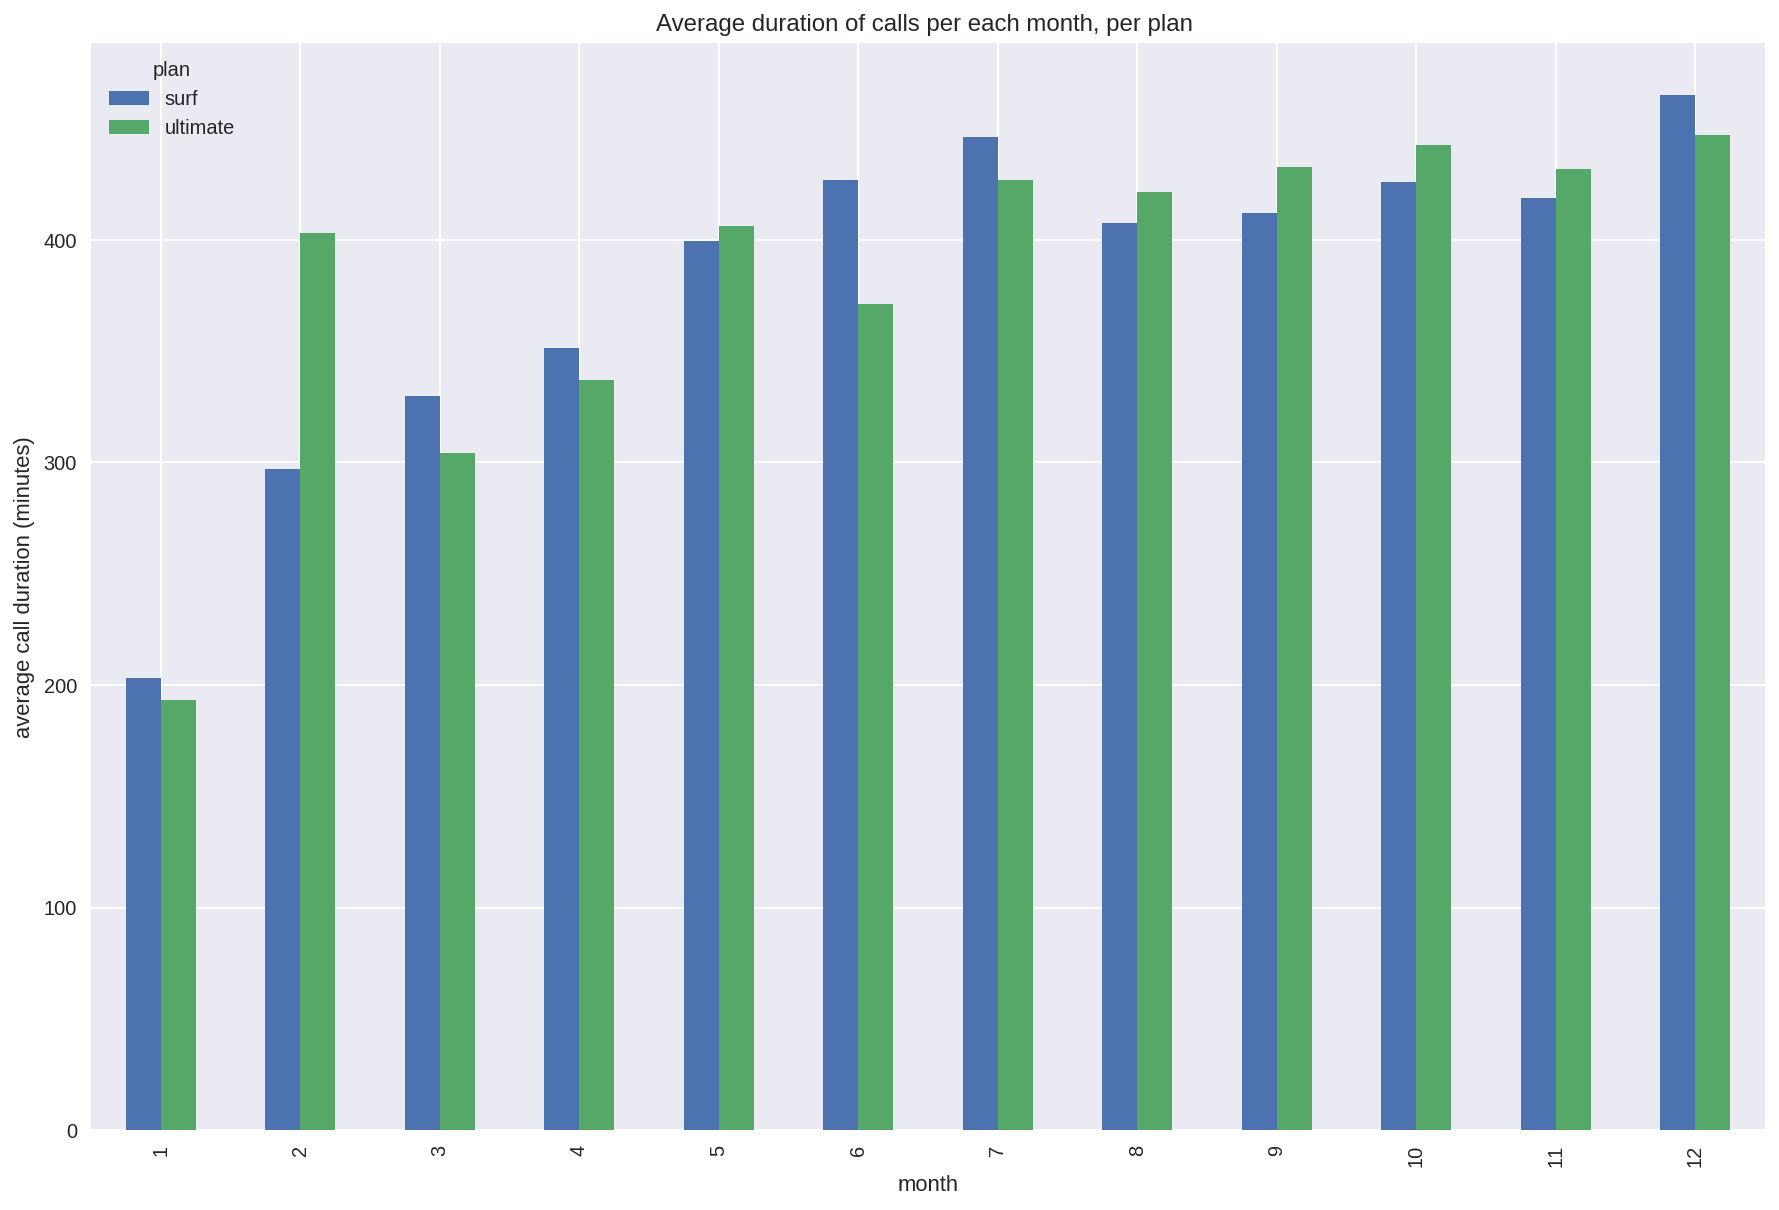

In [55]:
%config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

# Comparing average duration of calls per each plan per each distinct month


users_info.pivot_table(index='month',columns='plan', 
                       values='total_minutes', aggfunc='mean').plot(kind='bar', figsize=(15,10), grid=True)

plt.ylabel('average call duration (minutes)')
plt.title('Average duration of calls per each month, per plan ')

In [56]:
surf_average_minutes=users_info.query('plan=="surf"').pivot_table(
    index='month',values='total_minutes', aggfunc=['min', 'median', 'mean', 'max', 'std'])
surf_average_minutes.columns= ['min', 'median', 'mean', 'max', 'std']


ultimate_average_minutes=users_info.query('plan=="ultimate"').pivot_table(
    index='month',values='total_minutes', aggfunc=['min', 'median', 'mean', 'max', 'std'])

ultimate_average_minutes.columns= ['min', 'median', 'mean', 'max', 'std']

print('Surf plan minutes per month description',"\n")
print(surf_average_minutes.sort_values('mean', ascending=False), "\n")
print('Ultimate plan minutes per month description',"\n")
print(ultimate_average_minutes.sort_values('mean', ascending=False))


Surf plan minutes per month description 

       min  median        mean   max         std
month                                           
12       0   447.5  465.061728  1510  257.955385
7        0   450.0  446.295082  1176  249.320355
6        0   421.0  426.897959  1033  216.842690
10       0   431.0  426.133891  1227  231.037209
11       0   413.0  418.884615  1304  230.065995
9        0   425.0  412.102564  1212  217.337734
8        0   389.0  407.595092  1102  234.608253
5        0   415.0  399.584416  1055  244.446763
4       16   339.5  351.540000  1043  225.536567
3       35   334.0  330.000000   788  189.233622
2       39   254.0  297.000000   811  228.531179
1      114   203.0  203.000000   292  125.865007 

Ultimate plan minutes per month description 

       min  median        mean   max         std
month                                           
12       0   431.0  447.251613  1369  257.320095
10       0   458.5  442.388889  1215  238.693908
9        0   434.0  432.4827

The plots below show the total minutes users of each plan require each month. The purple colored histogram represents the ultimate plan, and the black colored histogram represents the surf plan. Both plans' distributions show a negative skewed distrubution for the total minutes require per each month. The average monthly minutes used by users for Surf plan was 382.01 minutes, and the variance was 5093.79 minutes^2. The average monthly minutes used by users for Ultimate plan was 384.76 minutes and the variance was 5098.33 minutes^2. 

Text(0.5, 0, 'monthly call time (minutes)')

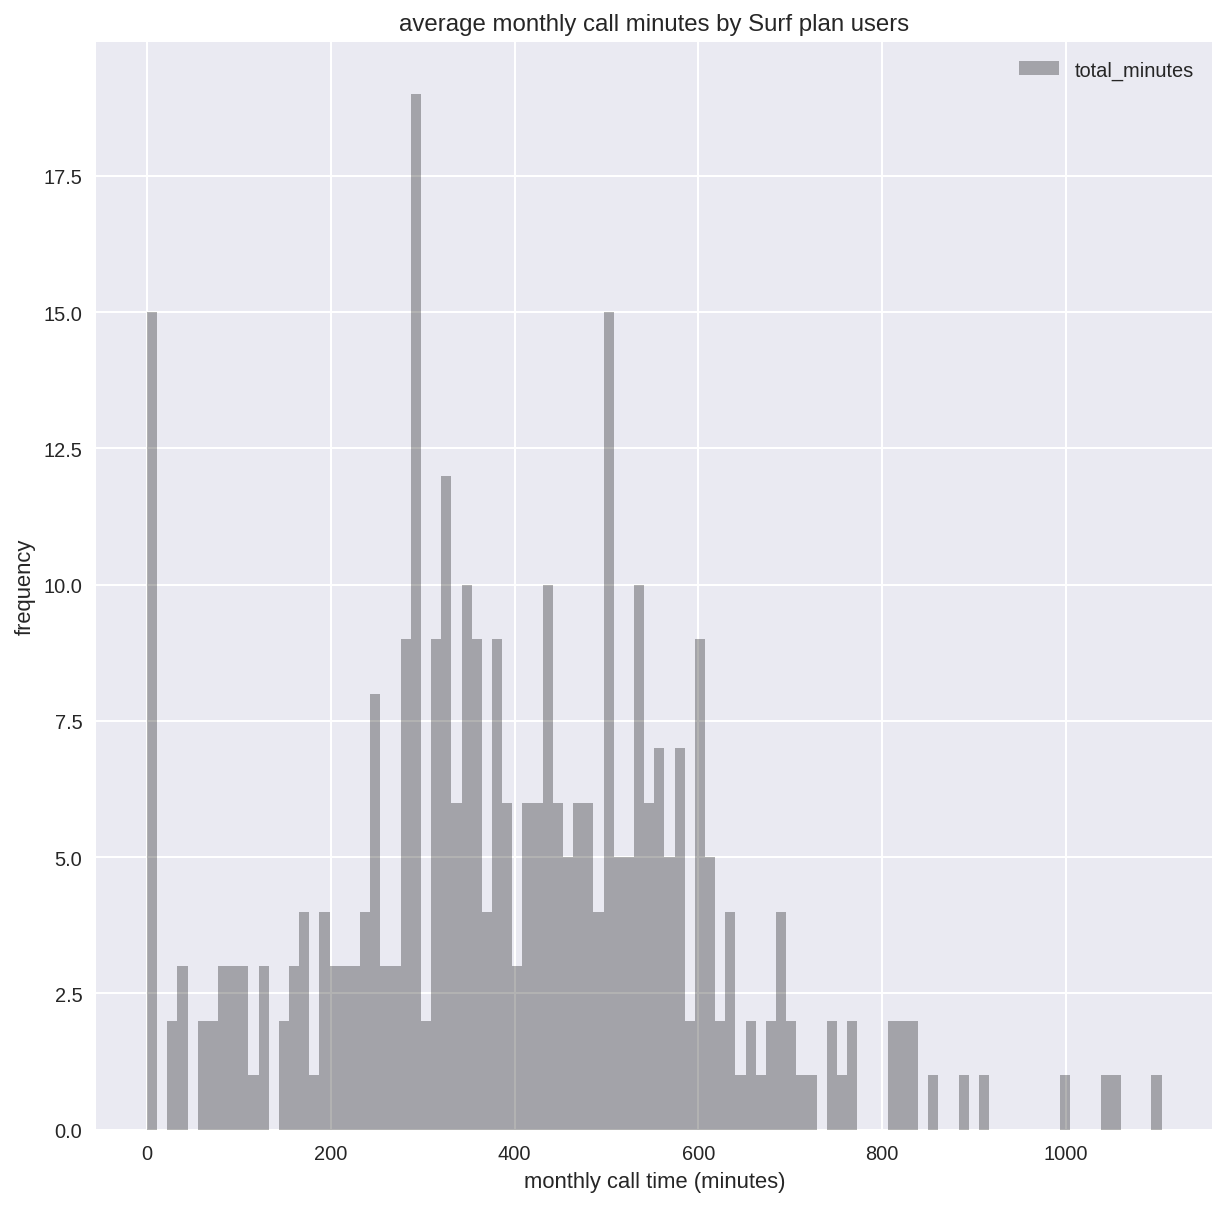

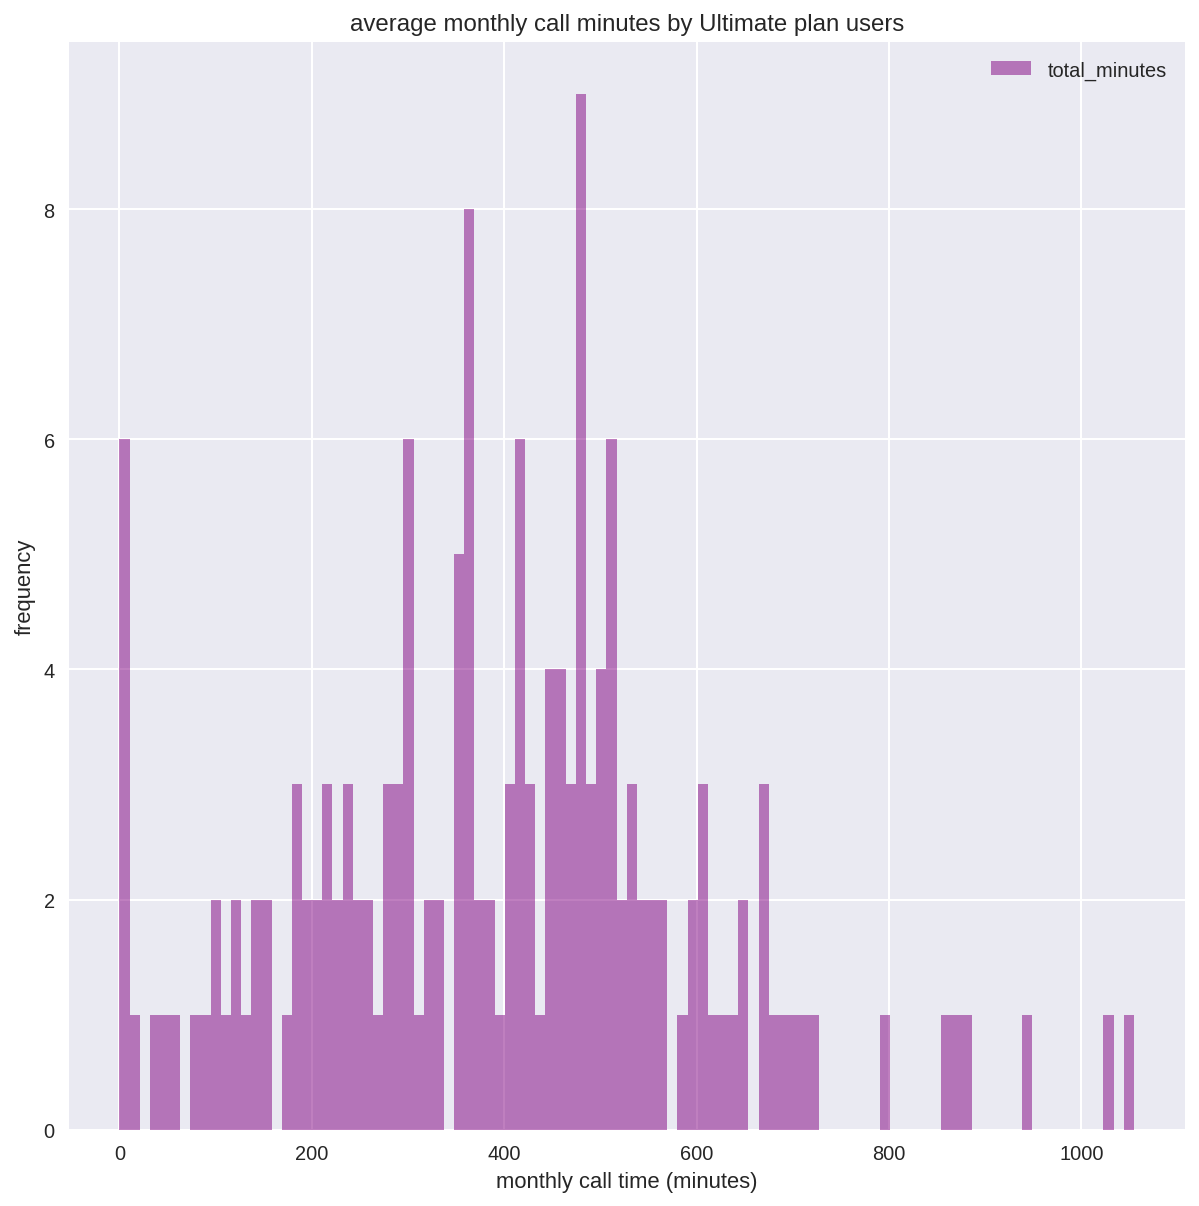

In [57]:
# Comparing the number of total minutes users of each plan require each month

users_info.query('plan=="surf"').pivot_table(index='user_id', values='total_minutes').plot(
    kind='hist',figsize=(10,10), alpha=0.3, color='black', 
    label="ultimate",bins=100)

plt.ylabel('frequency')
plt.title('average monthly call minutes by Surf plan users')
plt.xlabel('monthly call time (minutes)')


users_info.query('plan=="ultimate"').pivot_table(index='user_id', values='total_minutes').plot(
    kind='hist',figsize=(10,10), alpha=0.5, color='purple', 
    label="surf",bins=100)
                            

plt.ylabel('frequency')
plt.title('average monthly call minutes by Ultimate plan users')
plt.xlabel('monthly call time (minutes)')



In [58]:
# Calculate the mean and the variance of the monthly call duration

surf_monthly_minutes_avg=users_info.query('plan=="surf"').pivot_table(index='month',columns='plan', 
                       values='total_minutes', aggfunc='mean')
surf_monthly_minutes_avg.columns=['mean']


ult_monthly_minutes_avg=users_info.query('plan=="ultimate"').pivot_table(index='month',columns='plan', 
                       values='total_minutes', aggfunc='mean')
ult_monthly_minutes_avg.columns=['mean']


print('surf plan mean(min) and variance(min**2)')

print('surf monthly call duration mean:          ',round(surf_monthly_minutes_avg['mean'].mean().item(),2))
print('surf monthly call duration variance:      ',round(np.var(surf_monthly_minutes_avg['mean']).item(),2),"\n")

print('ultimate plan mean(min) and variance(min**2)')
print('ultimate monthly call duration mean       ',round(ult_monthly_minutes_avg['mean'].mean().item(),2))
print('ultimate monthly call duration variance   ',round(np.var(ult_monthly_minutes_avg['mean']).item(),2))




surf plan mean(min) and variance(min**2)
surf monthly call duration mean:           382.01
surf monthly call duration variance:       5093.79 

ultimate plan mean(min) and variance(min**2)
ultimate monthly call duration mean        384.76
ultimate monthly call duration variance    5098.33


The boxplots for the average montly minutes used for each plan are consistent with the histograms in that both distributions are negatively skewed in the boxplot distribution. Surf and ultimate plans presented an outlier value from the month of January with a value of 382.00, and 384.76 minutes, respectively. The surf plan had a slightly higher standard deviation with a value of 74.54 minutes, compared to ultimate plan that presented a standard deviation value of 74.56 minutes. In regards of interquantile range, the surf plan had a bigger IQR value than Ultimate plan. The surf plan presented an IQR value of 80.17 minutes, while the Ultimate plan presented and IQR value of 69.39 minutes. On average, the Surf plan presented the greatest maximum value of call duratation with a value of 465.10 minutes, compared to 447.30 for the Ultimate plan. 

             mean
count   12.000000
mean   382.007946
std     74.544377
min    203.000000
25%    346.155000
50%    409.848828
75%    426.324908
max    465.061728
IQR 80.17 minutes


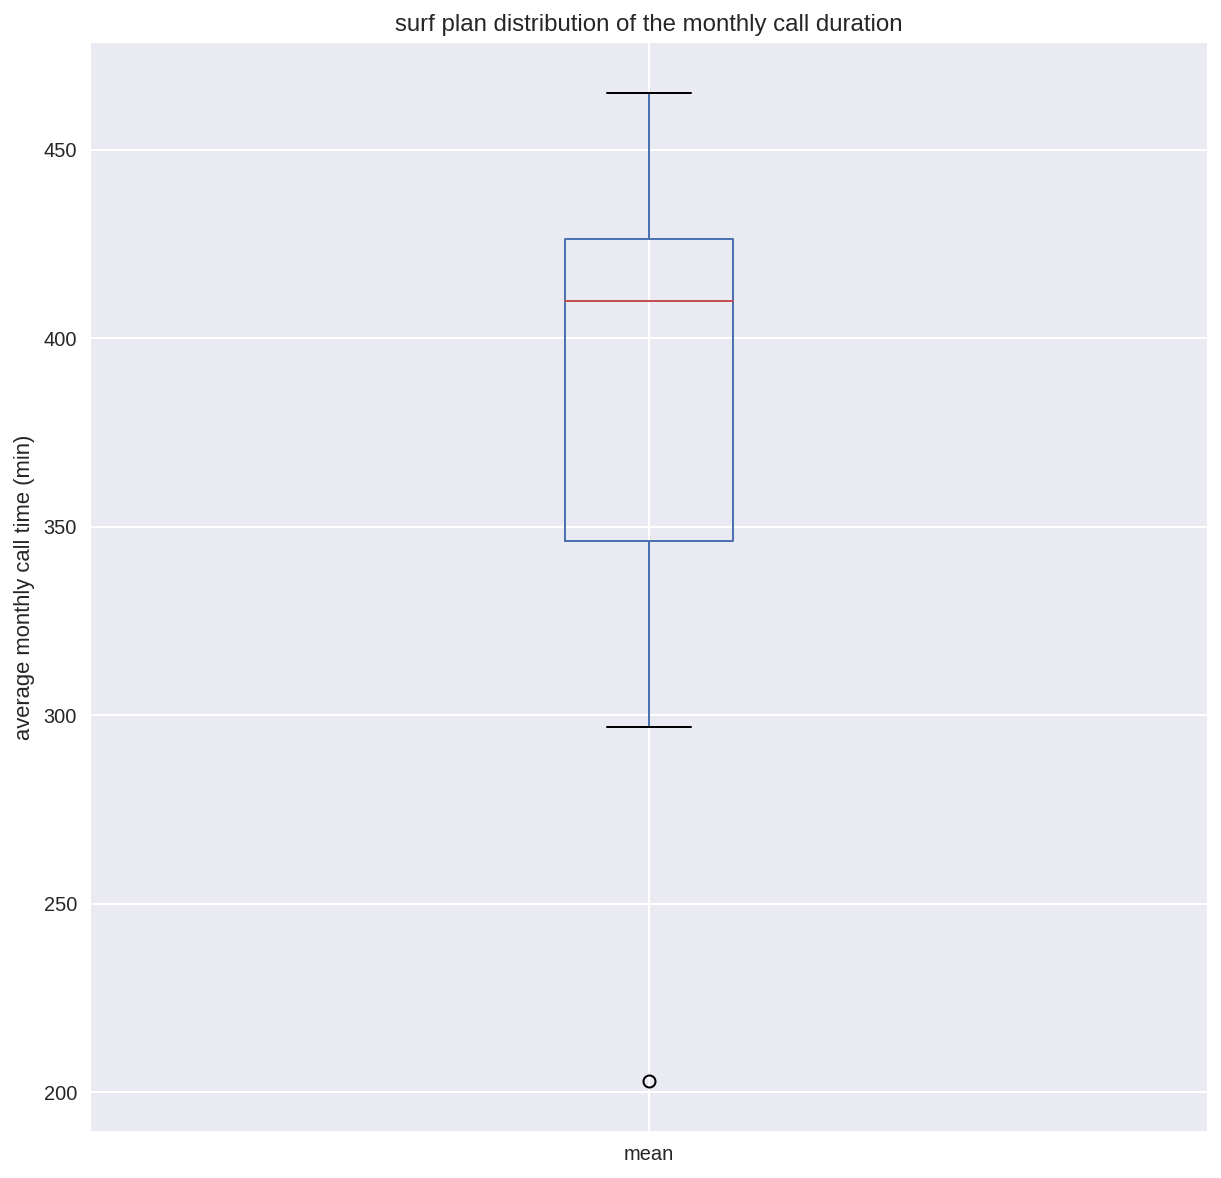

In [59]:
# Plot a boxplot to visualize the distribution of the monthly call duration

surf_monthly_minutes_avg.plot(kind='box', figsize=(10,10))
print(surf_monthly_minutes_avg.describe())
plt.ylabel('average monthly call time (min)')
plt.title('surf plan distribution of the monthly call duration')
print('IQR', round((surf_monthly_minutes_avg.quantile(0.75)-surf_monthly_minutes_avg.quantile(0.25)).item(),2), 'minutes')

             mean
count   12.000000
mean   384.764963
std     74.577579
min    193.500000
25%    362.432371
50%    413.839000
75%    431.822980
max    447.251613
IQR 69.39 minutes


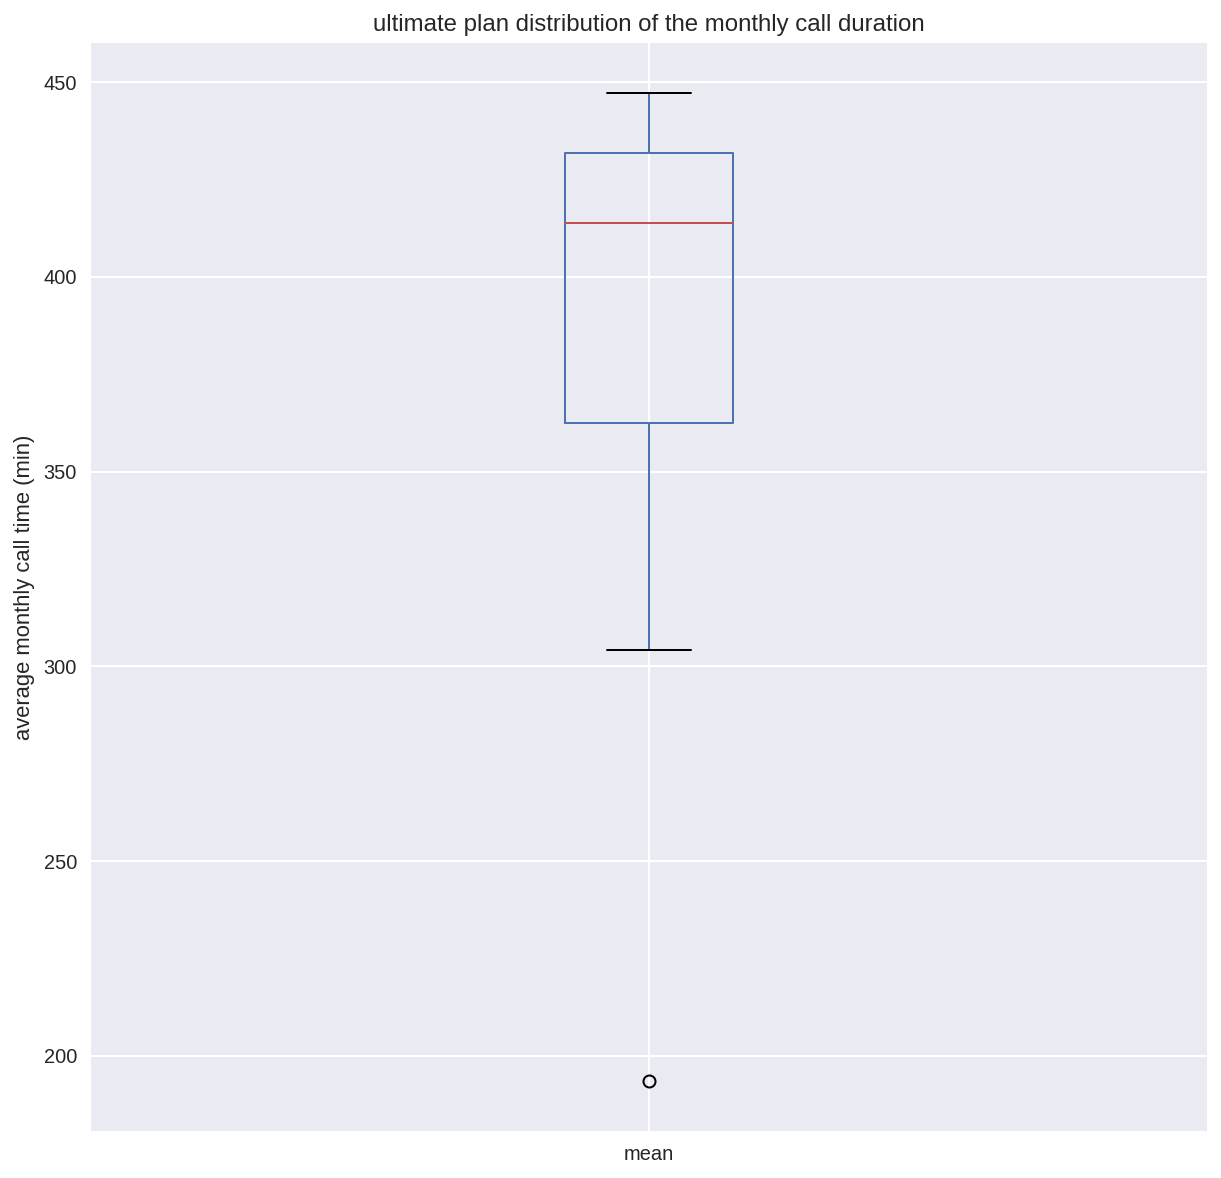

In [60]:
ult_monthly_minutes_avg.plot(kind='box', figsize=(10,10))
print(ult_monthly_minutes_avg.describe())
plt.ylabel('average monthly call time (min)')
plt.title('ultimate plan distribution of the monthly call duration')
print('IQR', round((ult_monthly_minutes_avg.quantile(0.75)-ult_monthly_minutes_avg.quantile(0.25)).item(),2), 'minutes')

Below, we tested if the calling behavior differed between users of each plan. We tested for 95% statistical significance the hypotheses below: 
- H0: `mean of monthly minutes of surf users equals the mean of monthly minutes of ultimate users. `
- H1: `mean of monthly minutes of surf users does not equal the mean of monthly minutes of ultimate users. `

Based on the results of the t-test from the two independent samples, we conclude that we failed to reject null hypothesis for 95% statistical significance and conclude that we do not have enough evidence to conclude that monthly minutes used, on  average, differs from surf and ultimate plans. 

In [61]:
#testing for users behaviors on minutes used monthly per plan.
alpha=0.05

results=st.ttest_ind(surf_monthly_minutes_avg['mean'], ult_monthly_minutes_avg['mean'])
                      
p_value= results.pvalue

print (p_value)

if results.pvalue < alpha :
    print ('we reject the null')
else:
    print ('we cannot reject the null')
    

0.9286506953384237
we cannot reject the null


### Messages

The bar plot below describes the average numbers of messages sent by user per each plan, per each disticnt month. As we notice from the description of the plot, the top 3 months with the greatest average number of messagest sent for Surf plan are December, October and November with means of 37.90, 33.56, and 32.05 messages, respectively. For the Ultimate plan, the top three months with the greatest means for messagest sent are December, October, and August with mean values of 43.85, 38.71, and 38.48 messages, respectively. For both plans, the month that had the smallest mean value for number of messages sent was January. For Surf plan, the month that had the highest standard deviation, in messages, was December with a value of 38.18 messages. For the Ultimate plan, the month that had the highest value for standard deviation was February with a value of 39.50 messages. Both plans had the smallest standard deviation of monthly messages sent in the month of January.

Text(0.5, 1.0, 'Average messages sent per each month, per plan ')

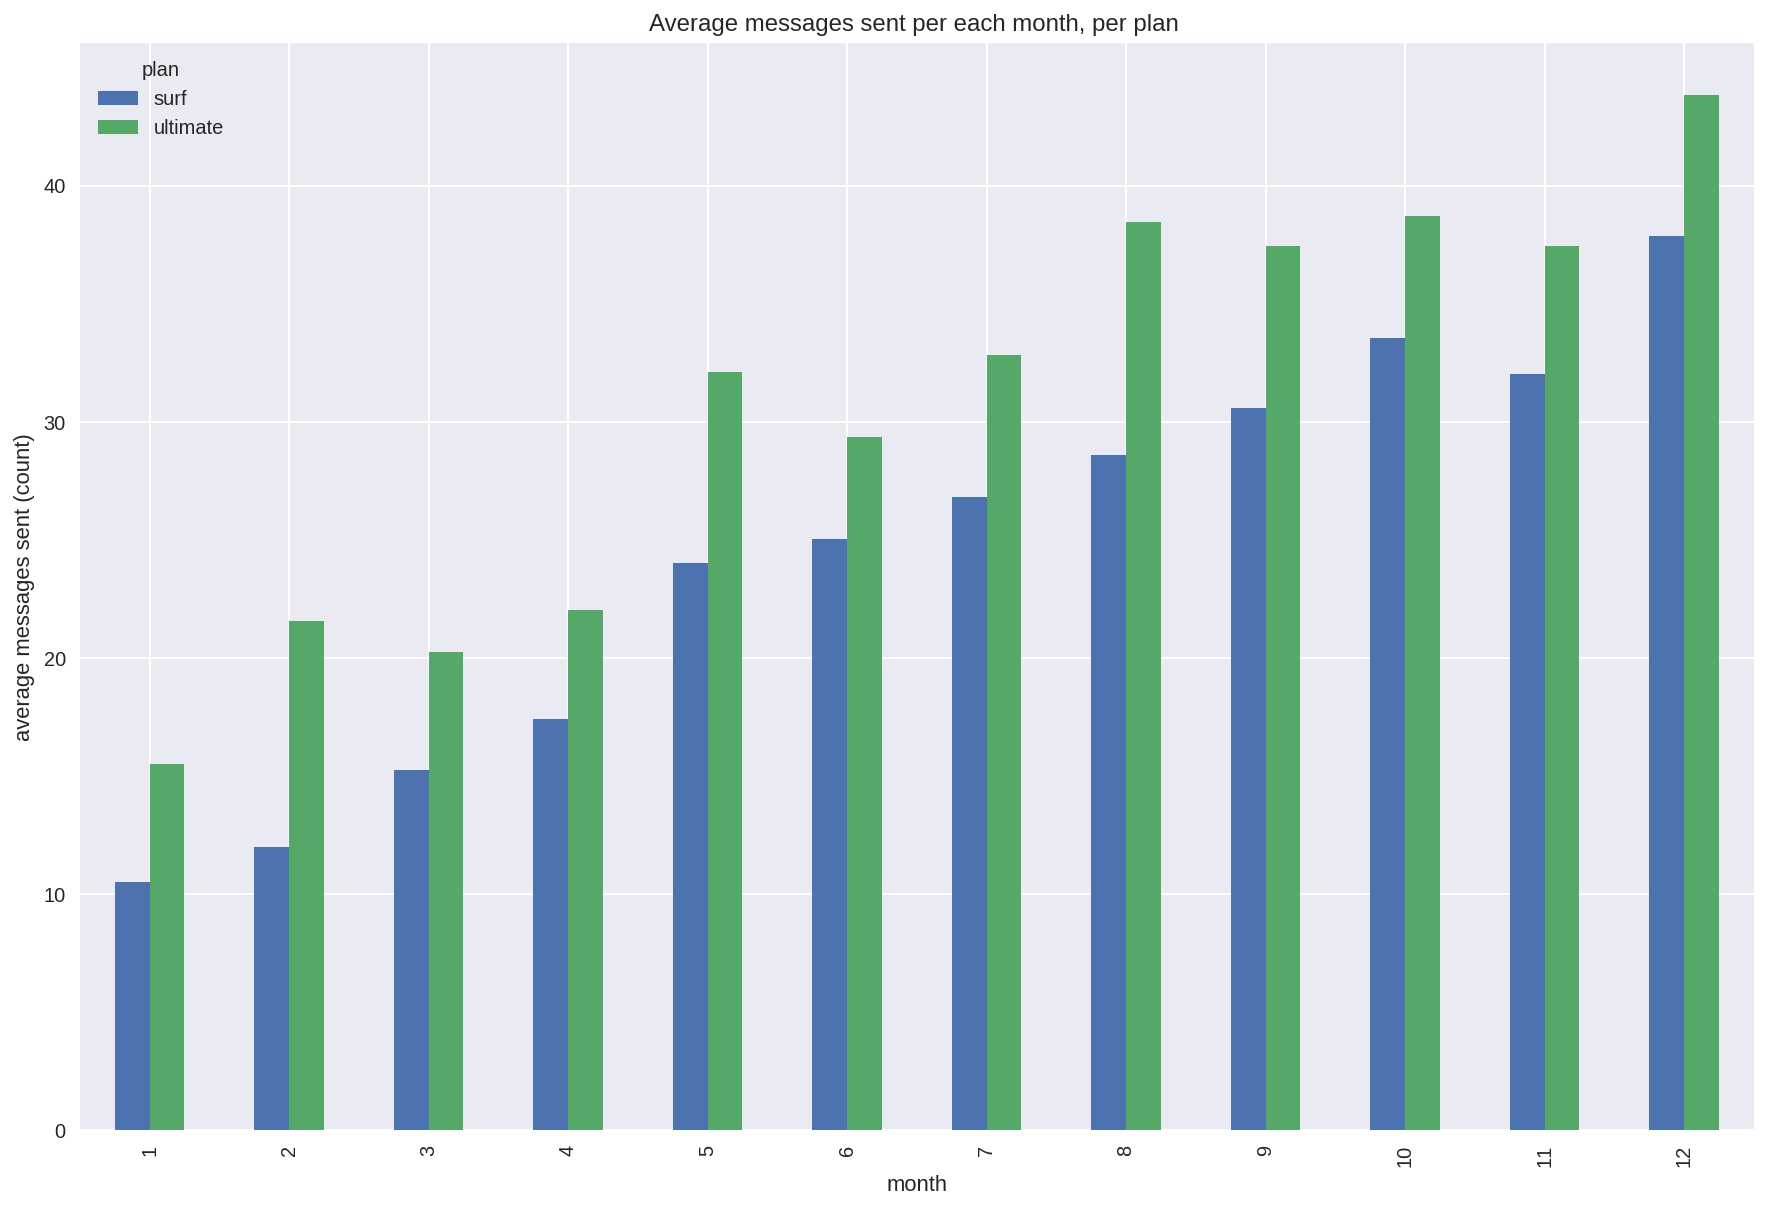

In [62]:
# Compare the number of messages users of each plan tend to send each month


users_info.pivot_table(index='month',columns='plan', 
                       values='total_messages', aggfunc='mean').plot(kind='bar', figsize=(15,10), grid=True)

plt.ylabel('average messages sent (count)')
plt.title('Average messages sent per each month, per plan ')

In [63]:
surf_average_messages=users_info.query('plan=="surf"').pivot_table(
    index='month',values='total_messages', aggfunc=['min', 'median', 'mean', 'max', 'std'])
surf_average_messages.columns= ['min', 'median', 'mean', 'max', 'std']


ultimate_average_messages=users_info.query('plan=="ultimate"').pivot_table(
    index='month',values='total_messages', aggfunc=['min', 'median', 'mean', 'max', 'std'])

ultimate_average_messages.columns= ['min', 'median', 'mean', 'max', 'std']

print('Surf plan messages sent per month description',"\n")
print(surf_average_messages.sort_values('std', ascending=False), "\n")
print('Ultimate plan messages sent per month description',"\n")
print(ultimate_average_messages.sort_values('std', ascending=False))

Surf plan messages sent per month description 

       min  median       mean  max        std
month                                        
12       0    29.5  37.885802  266  38.186879
10       0    25.0  33.556485  224  35.697197
11       0    27.0  32.045455  180  32.635166
8        0    20.0  28.601227  156  32.066201
9        0    22.0  30.605128  153  31.678198
7        0    19.5  26.811475  164  30.368898
6        0    14.0  25.040816  133  30.199651
5        0    15.0  24.012987  149  29.106652
4        0    10.0  17.400000  120  22.396246
2        0     3.0  12.000000   58  19.646883
3        0     7.0  15.260870   59  18.616262
1        0    10.5  10.500000   21  14.849242 

Ultimate plan messages sent per month description 

       min  median       mean  max        std
month                                        
12       0    39.0  43.845161  150  39.502284
5        0    19.0  32.103448  149  36.018195
11       0    30.0  37.427481  166  35.202279
10       0    34.5  38.7

The plots below show the total messages users of each plan require each month. The purple colored histogram represents the ultimate plan, and the black colored histogram represents the surf plan. The average monthly messages sent by users for Surf plan was 24.48 messages, and the variance was 72.18 messages^2. The average monthly messages sent by users for Ultimate plan was 30.80 messages and the variance was 70.60 messages^2. 

Text(0.5, 0, 'monthly messages sent (messages)')

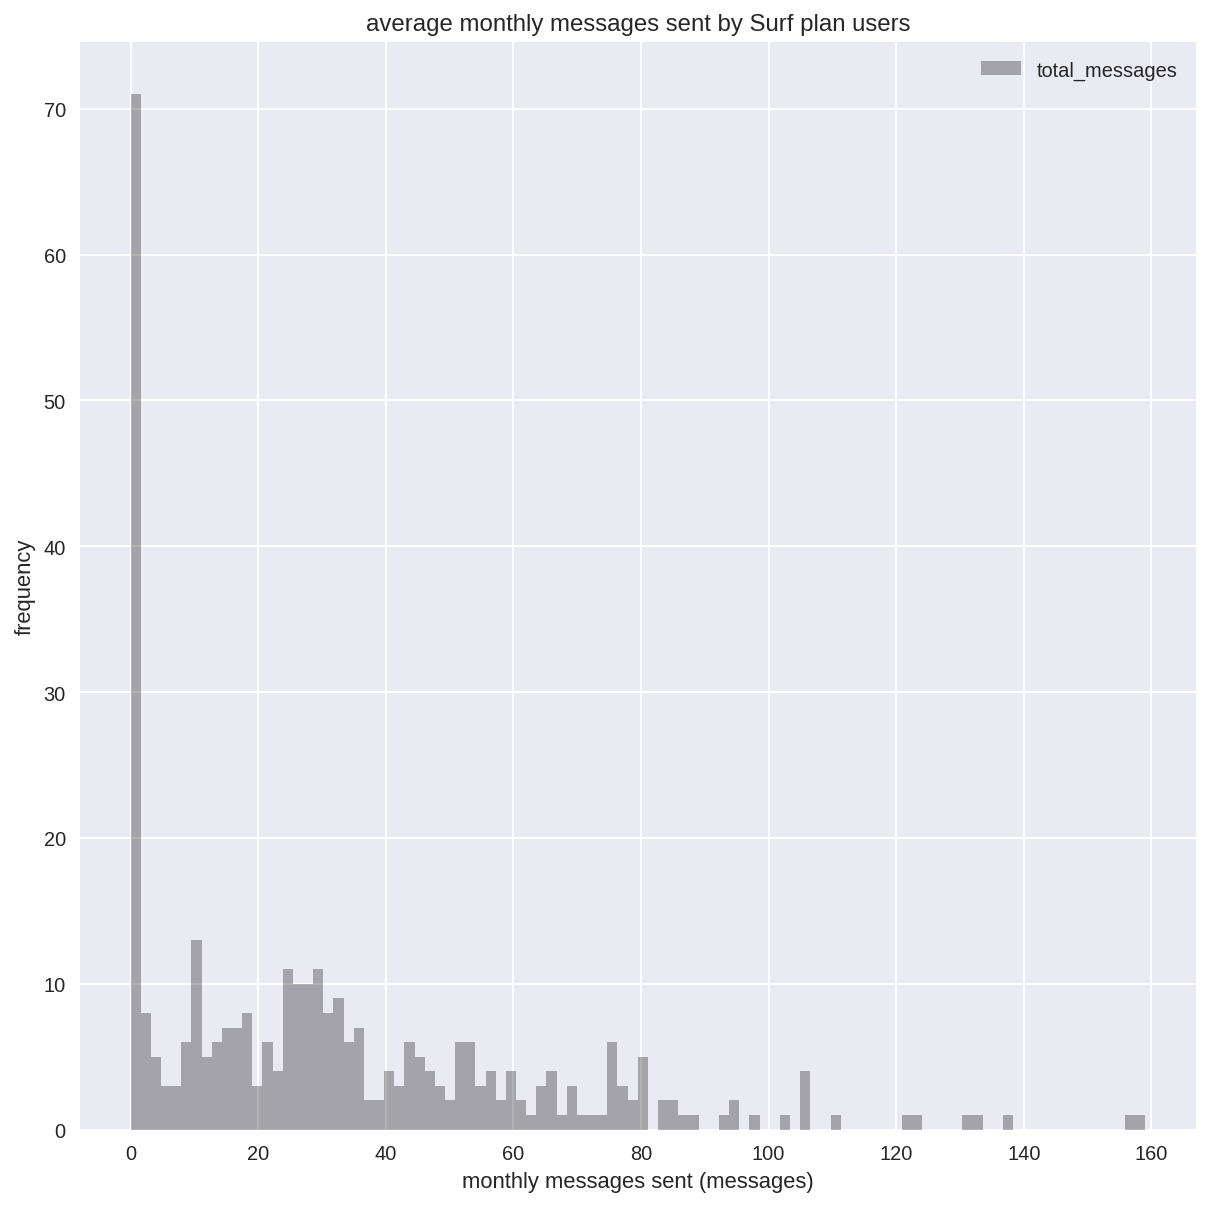

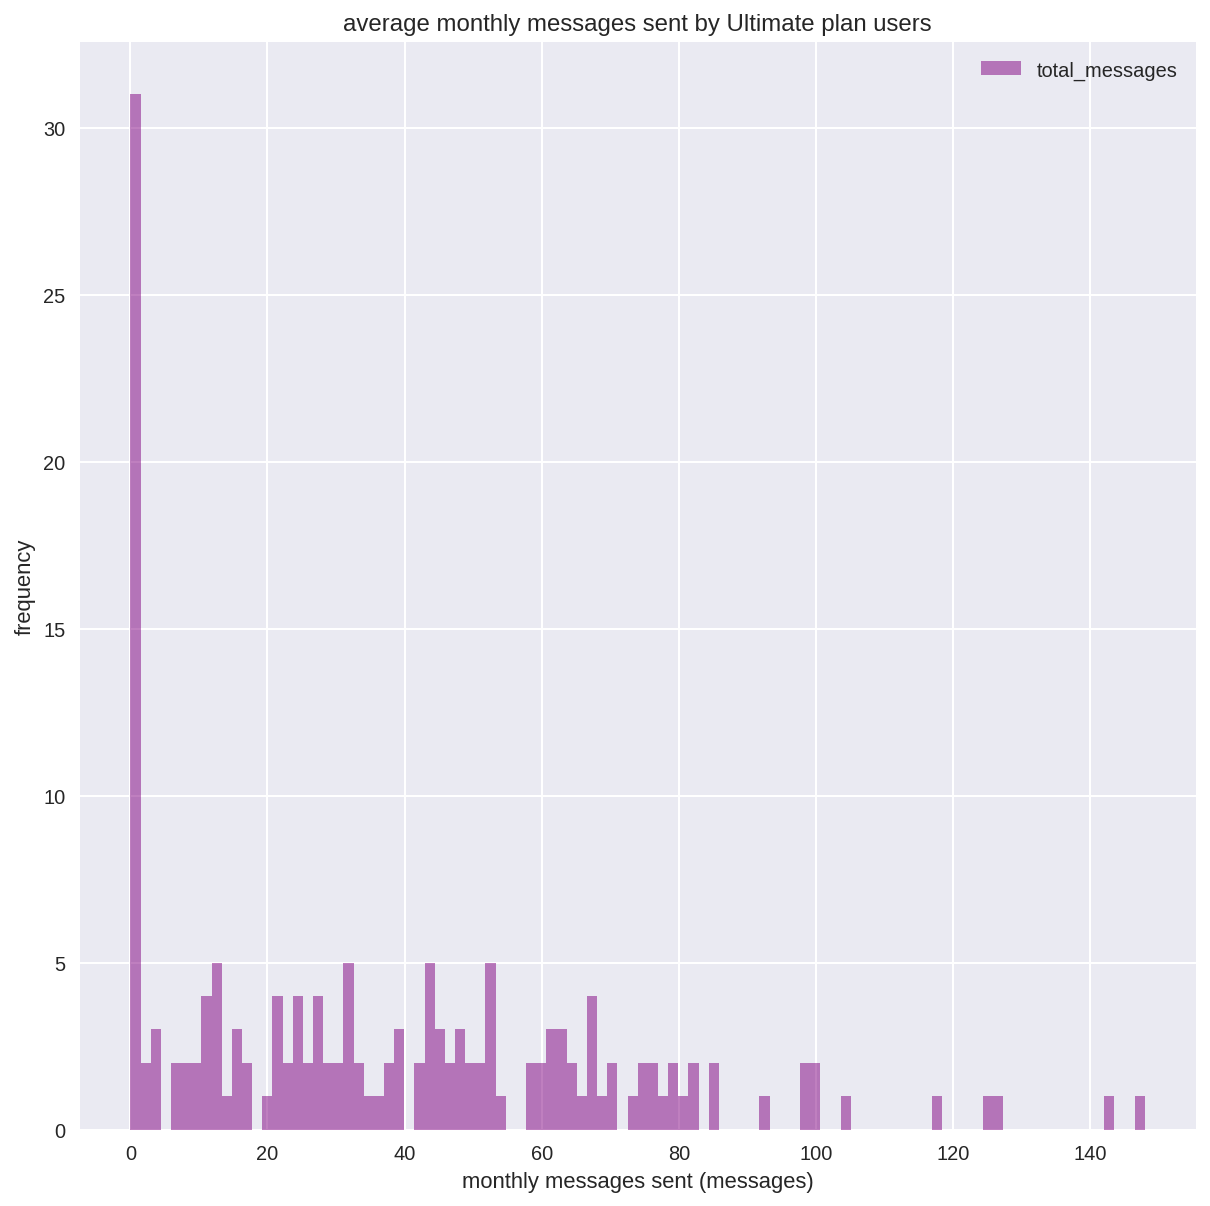

In [64]:
# Comparing the number of total messages users of each plan require each month

users_info.query('plan=="surf"').pivot_table(index='user_id', values='total_messages').plot(
    kind='hist',figsize=(10,10), alpha=0.3, color='black', 
    label="surf",bins=100)

plt.ylabel('frequency')
plt.title('average monthly messages sent by Surf plan users')
plt.xlabel('monthly messages sent (messages)')


users_info.query('plan=="ultimate"').pivot_table(index='user_id', values='total_messages').plot(
    kind='hist',figsize=(10,10), alpha=0.5, color='purple', 
    label="ultimate",bins=100)
                            

plt.ylabel('frequency')
plt.title('average monthly messages sent by Ultimate plan users')
plt.xlabel('monthly messages sent (messages)')


In [65]:
surf_monthly_messages_avg=users_info.query('plan=="surf"').pivot_table(index='month',columns='plan', 
                       values='total_messages', aggfunc='mean')
surf_monthly_messages_avg.columns=['mean']


ult_monthly_messages_avg=users_info.query('plan=="ultimate"').pivot_table(index='month',columns='plan', 
                       values='total_messages', aggfunc='mean')
ult_monthly_messages_avg.columns=['mean']


print('surf plan mean(messages) and variance(messages**2)')

print('surf monthly messages mean:          ',round(surf_monthly_messages_avg['mean'].mean().item(),2))
print('surf monthly messages variance:      ',round(np.var(surf_monthly_messages_avg['mean']).item(),2),"\n")

print('ultimate plan mean(messages) and variance(messages**2)')
print('ultimate monthly messages mean       ',round(ult_monthly_messages_avg['mean'].mean().item(),2))
print('ultimate monthly messages variance   ',round(np.var(ult_monthly_messages_avg['mean']).item(),2))


surf plan mean(messages) and variance(messages**2)
surf monthly messages mean:           24.48
surf monthly messages variance:       72.18 

ultimate plan mean(messages) and variance(messages**2)
ultimate monthly messages mean        30.8
ultimate monthly messages variance    74.6


The boxplots for the average montly messages sent for each plan are consistent with the histograms in that both distributions are negatively skewed. Surf and ultimate plans did not presented any outliers values. The Ultimate plan had a slightly higher standard deviation with a value of 9.02 messages, compared to Surf plan that presented a standard deviation value of 8.87 messages. In regards of interquantile range, the ultimate plan had a bigger IQR value than Surf plan. The surf plan presented an IQR value of 14.1 messages, while the Ultimate plan presented and IQR value of 15.79 messages. On average, the ultimate plan presented the greatest maximum value of messages sent with a value of 43.84 messages, compared to 37.88 for the surf plan.

            mean
count  12.000000
mean   24.476687
std     8.873422
min    10.500000
25%    16.865217
50%    25.926146
75%    30.965210
max    37.885802
IQR 14.1 messages


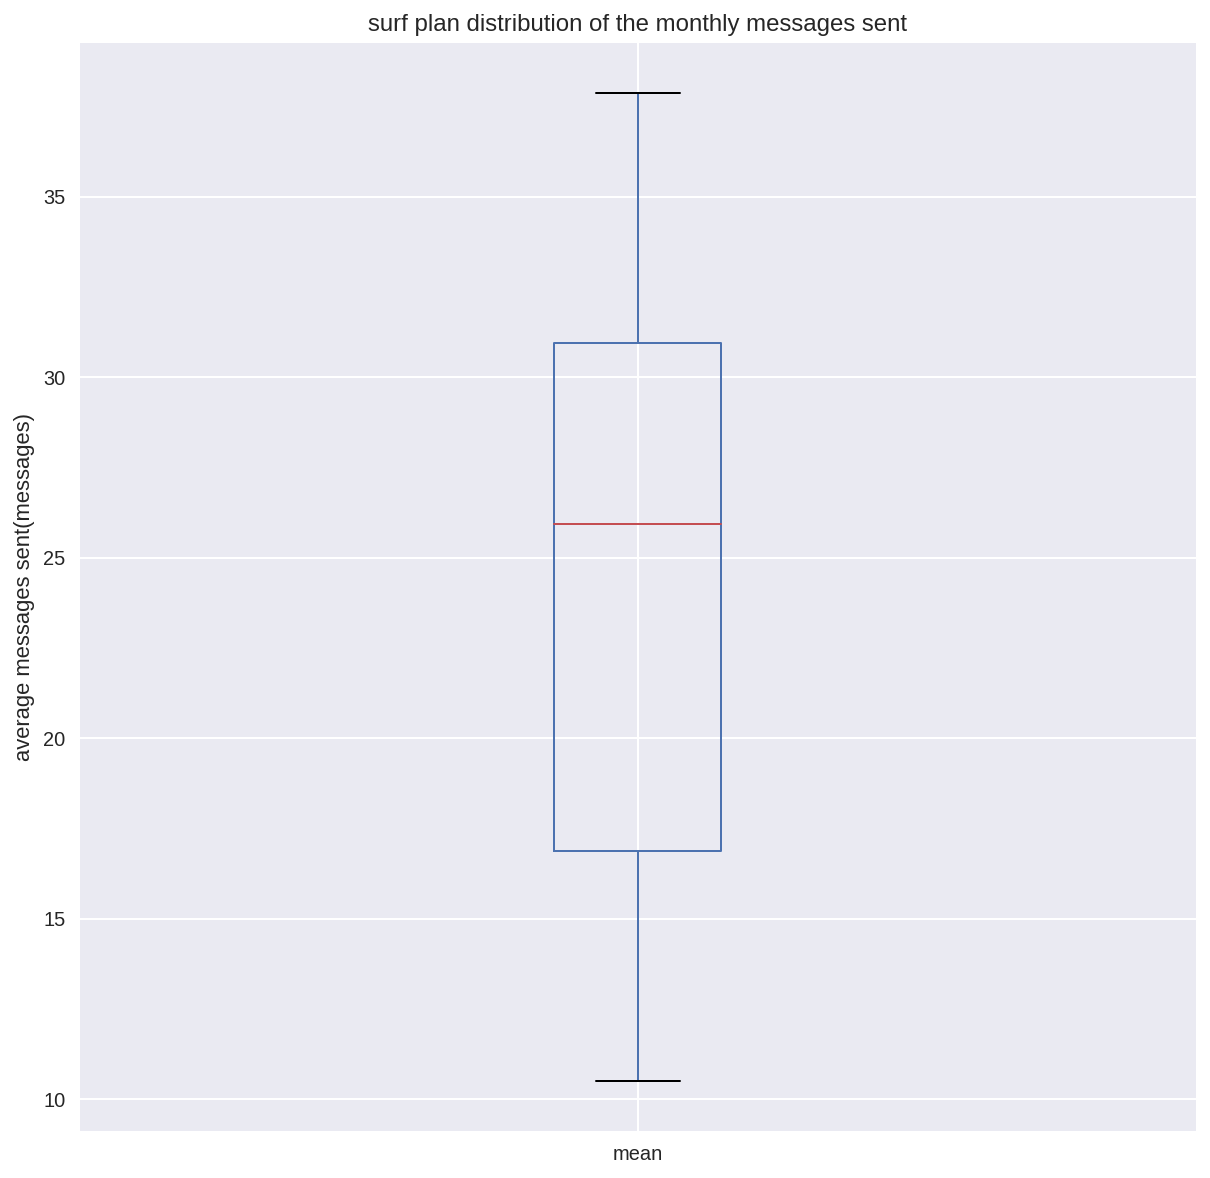

In [66]:
# Plot a boxplot to visualize the distribution of the monthly messages sent
surf_monthly_messages_avg.plot(kind='box', figsize=(10,10))
print(surf_monthly_messages_avg.describe())
plt.ylabel('average messages sent(messages)')
plt.title('surf plan distribution of the monthly messages sent')
print('IQR', round((surf_monthly_messages_avg.quantile(0.75)-surf_monthly_messages_avg.quantile(0.25)).item(),2), 'messages')

            mean
count  12.000000
mean   30.797307
std     9.020924
min    15.500000
25%    21.928571
50%    32.466978
75%    37.714546
max    43.845161
IQR 15.79 messages


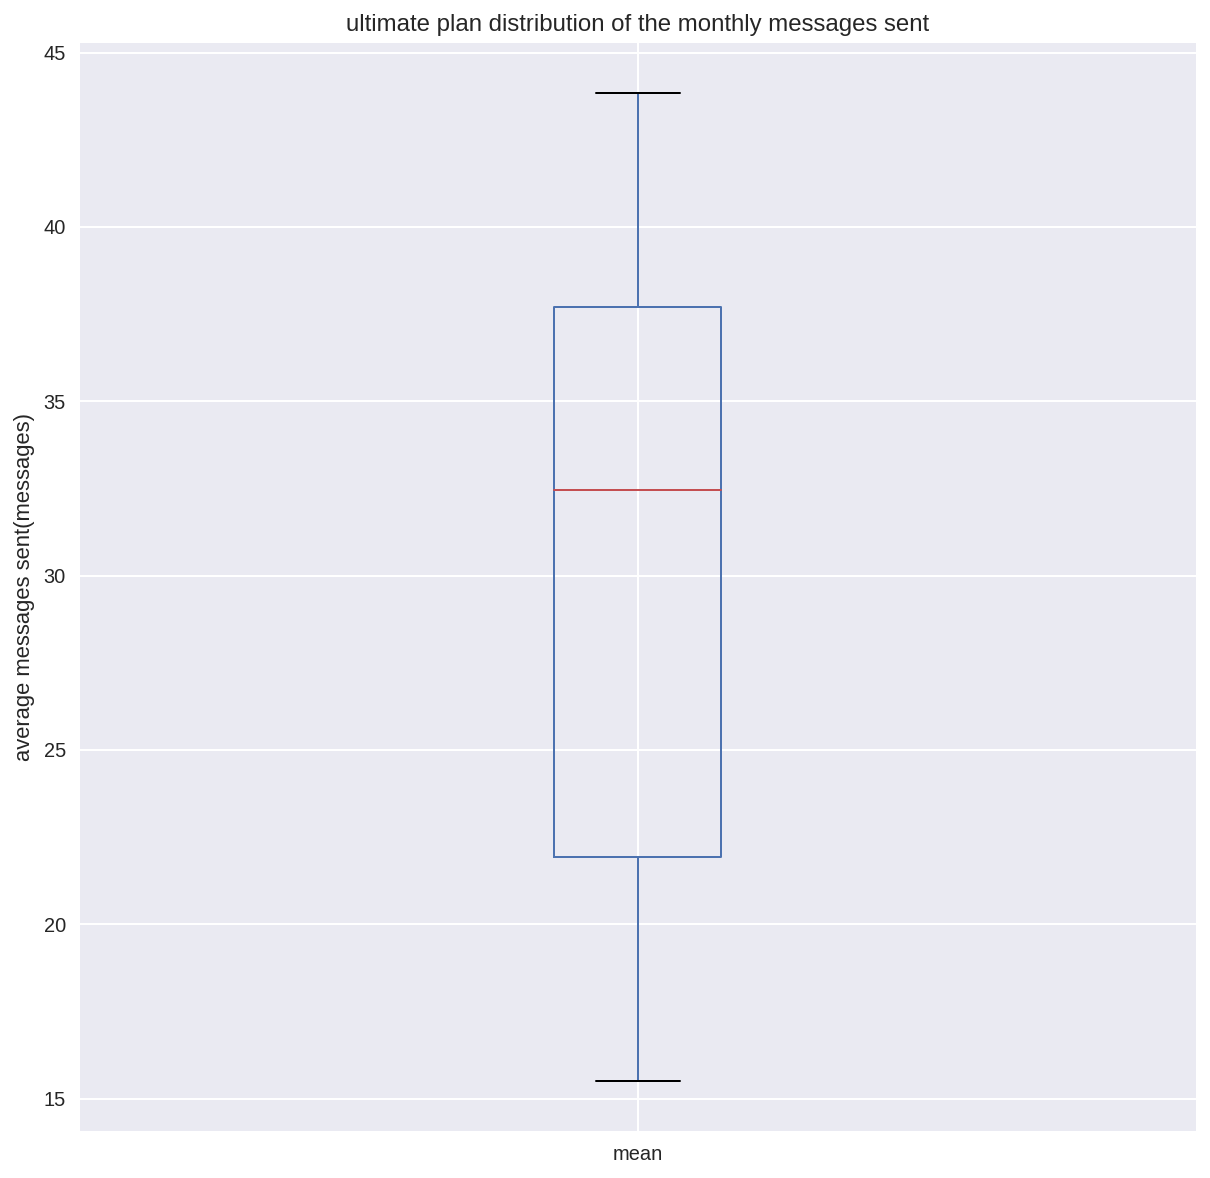

In [67]:
ult_monthly_messages_avg.plot(kind='box', figsize=(10,10))
print(ult_monthly_messages_avg.describe())
plt.ylabel('average messages sent(messages)')
plt.title('ultimate plan distribution of the monthly messages sent')
print('IQR', round((ult_monthly_messages_avg.quantile(0.75)-ult_monthly_messages_avg.quantile(0.25)).item(),2), 'messages')

Below, we tested if the messages sent behavior differed between users of each plan. We tested for 95% statistical significance the hypotheses below: 
- H0: `mean of monthly messages sent of surf users equals the mean of monthly messages sent of ultimate users. `
- H1: `mean of monthly messages sent of surf users does not equal the mean of monthly messages sent of ultimate users. `
Based on the results of the t-test from the two independent samples, we conclude that we failed to reject null hypothesis for 95% statistical significance and conclude that we do not have enough evidence to conclude that monthly messages sent, on average, differs from surf and ultimate plans. 

In [68]:
#testing for users behaviors on messages used monthly per plan.
alpha=0.05

results=st.ttest_ind(surf_monthly_messages_avg['mean'], ult_monthly_messages_avg['mean'])
                      
p_value= results.pvalue

print (p_value)

if results.pvalue < alpha :
    print ('we reject the null')
else:
    print ('we cannot reject the null')

0.09757254264484709
we cannot reject the null


### Internet

The bar plot below describes the average numbers of gigabytes used by user per each plan, per each disticnt month. As we notice from the description of the plot, the top 3 months with the greatest average number of gigabytes used for Surf plan are December, October and August with means of 17.90, 17.90, and 16.77 gigabytes, respectively. For the Ultimate plan, the top three months with the greatest means for messagest sent are March, December, and August with mean values of 18.41, 17.92, and 17.84 gigabytes, respectively. For both plans, the month that had the smallest mean value for number of gigabytes used was January. For Surf plan, the month that had the highest standard deviation, in gigabytes, was December with a value of 8.6 gigabytes. For the Ultimate plan, the month that had the highest value for standard deviation was March with a value of 11.7 gigabytes. Both plans had the smallest standard deviation of monthly gigabytes used in the month of January.

Text(0.5, 1.0, 'Average gigabytes used per each month, per plan ')

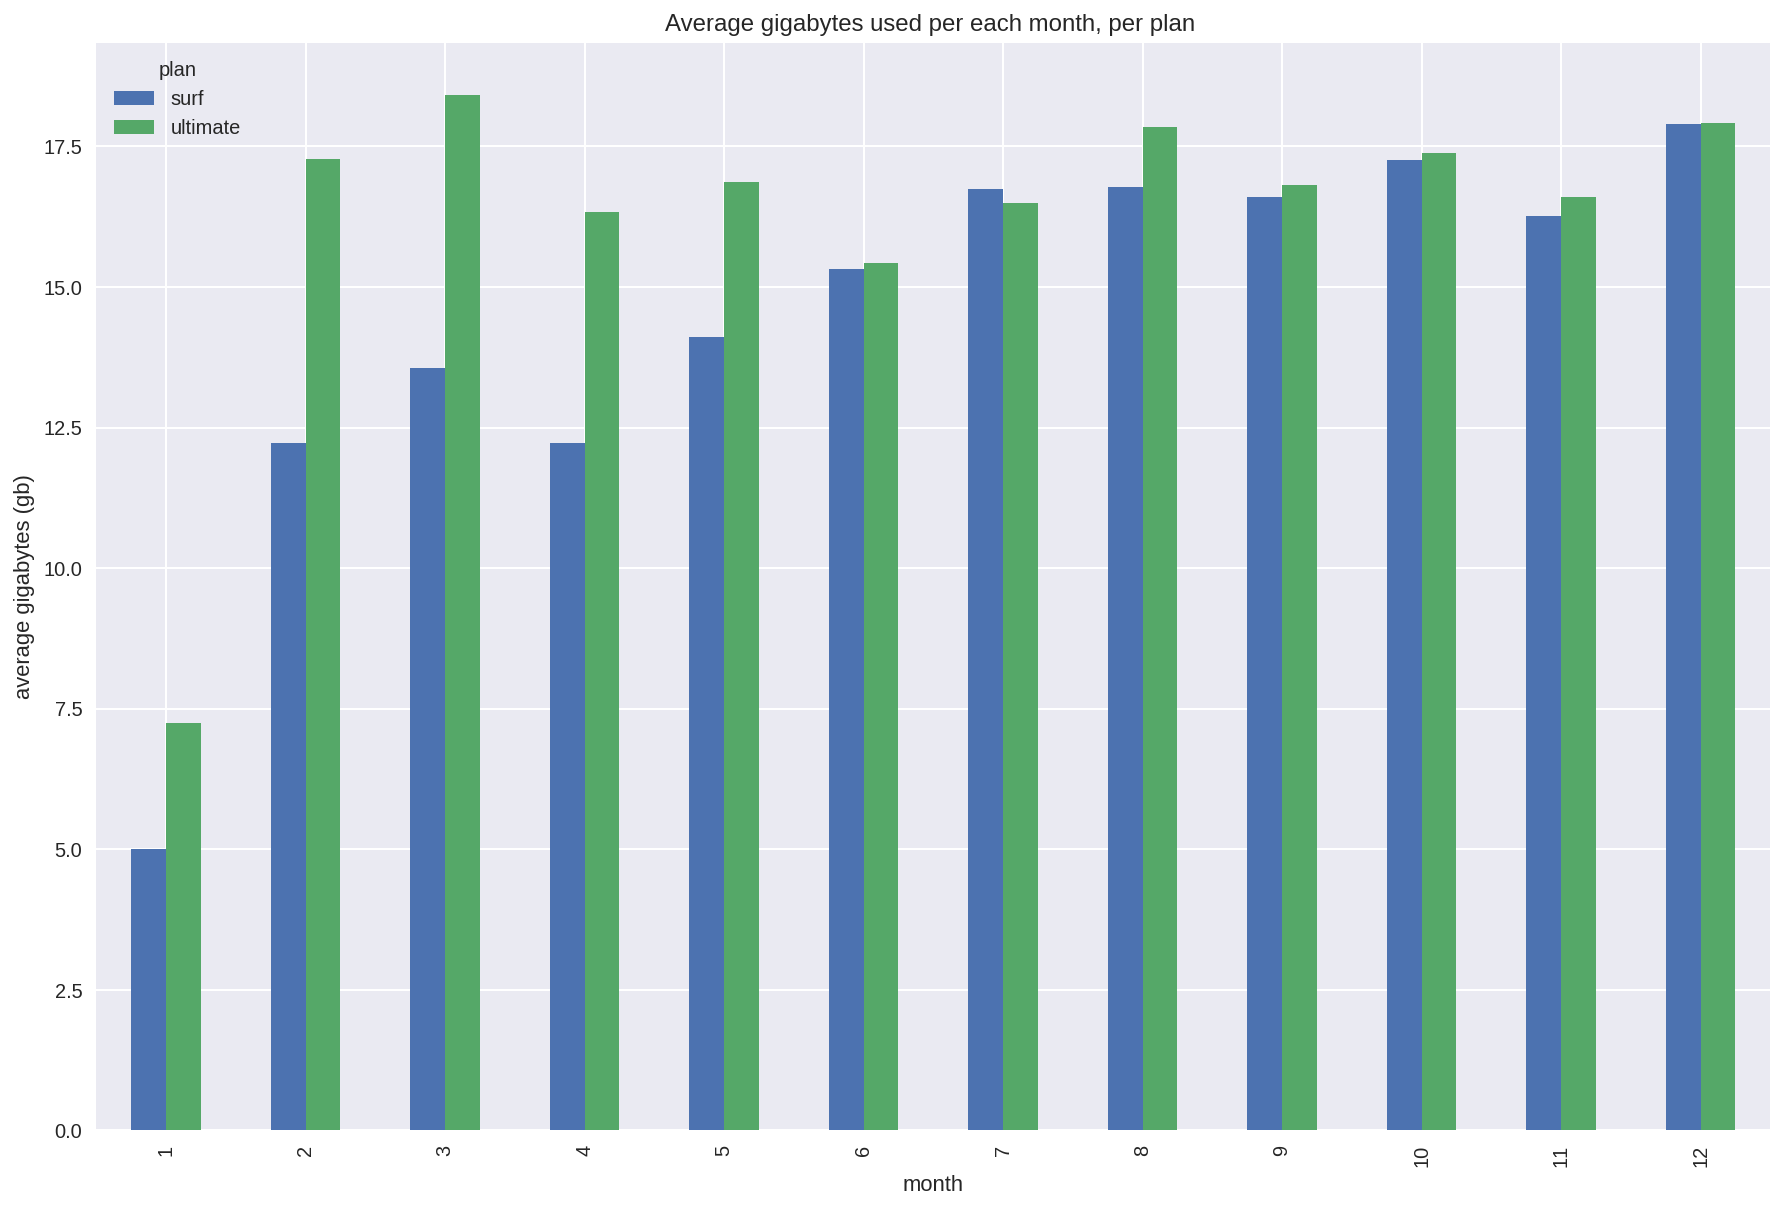

In [69]:
# Compare the number of gigabytes users of each plan tend to send each month


users_info.pivot_table(index='month',columns='plan', 
                       values='total_gb', aggfunc='mean').plot(kind='bar', figsize=(15,10), grid=True)

plt.ylabel('average gigabytes (gb)')
plt.title('Average gigabytes used per each month, per plan ')

In [70]:
surf_average_internet=users_info.query('plan=="surf"').pivot_table(
    index='month',values='total_gb', aggfunc=['min', 'median', 'mean', 'max', 'std'])
surf_average_internet.columns= ['min', 'median', 'mean', 'max', 'std']


ultimate_average_internet=users_info.query('plan=="ultimate"').pivot_table(
    index='month',values='total_gb', aggfunc=['min', 'median', 'mean', 'max', 'std'])

ultimate_average_internet.columns= ['min', 'median', 'mean', 'max', 'std']

print('Surf plan gigabytes used per month description',"\n")
print(surf_average_internet.sort_values('std', ascending=False), "\n")
print('Ultimate plan gigabytes used per month description',"\n")
print(ultimate_average_internet.sort_values('std', ascending=False))

Surf plan gigabytes used per month description 

       min  median       mean  max       std
month                                       
12       0      18  17.901235   70  8.601757
8        0      17  16.779141   51  8.528112
3        2      14  13.565217   30  7.999012
7        0      17  16.737705   39  7.956289
10       0      18  17.263598   46  7.920931
5        0      14  14.116883   36  7.627813
11       0      17  16.258741   42  7.539569
4        0      12  12.220000   28  7.497728
9        0      17  16.605128   37  7.100383
6        0      16  15.326531   37  7.050299
2        1      12  12.222222   20  6.437736
1        2       5   5.000000    8  4.242641 

Ultimate plan gigabytes used per month description 

       min  median       mean  max        std
month                                        
3        2      21  18.416667   36  11.774073
4        3      16  16.333333   37   9.264628
6        2      15  15.425532   38   8.298100
12       0      17  17.922581   46  

The plots below show the total gigabytes users of each plan require each month. The purple colored histogram represents the ultimate plan, and the black colored histogram represents the surf plan. The average monthly gigabytes used by users for Surf plan was 14.5 gigabytes, and the variance was 11.61 gigabytes^2. The average monthly gigabytes used by users for Ultimate plan was 16.22 gigabytes and the variance was 7.91 gigabytes^2. 

Text(0.5, 0, 'monthly gigabytes used (gb)')

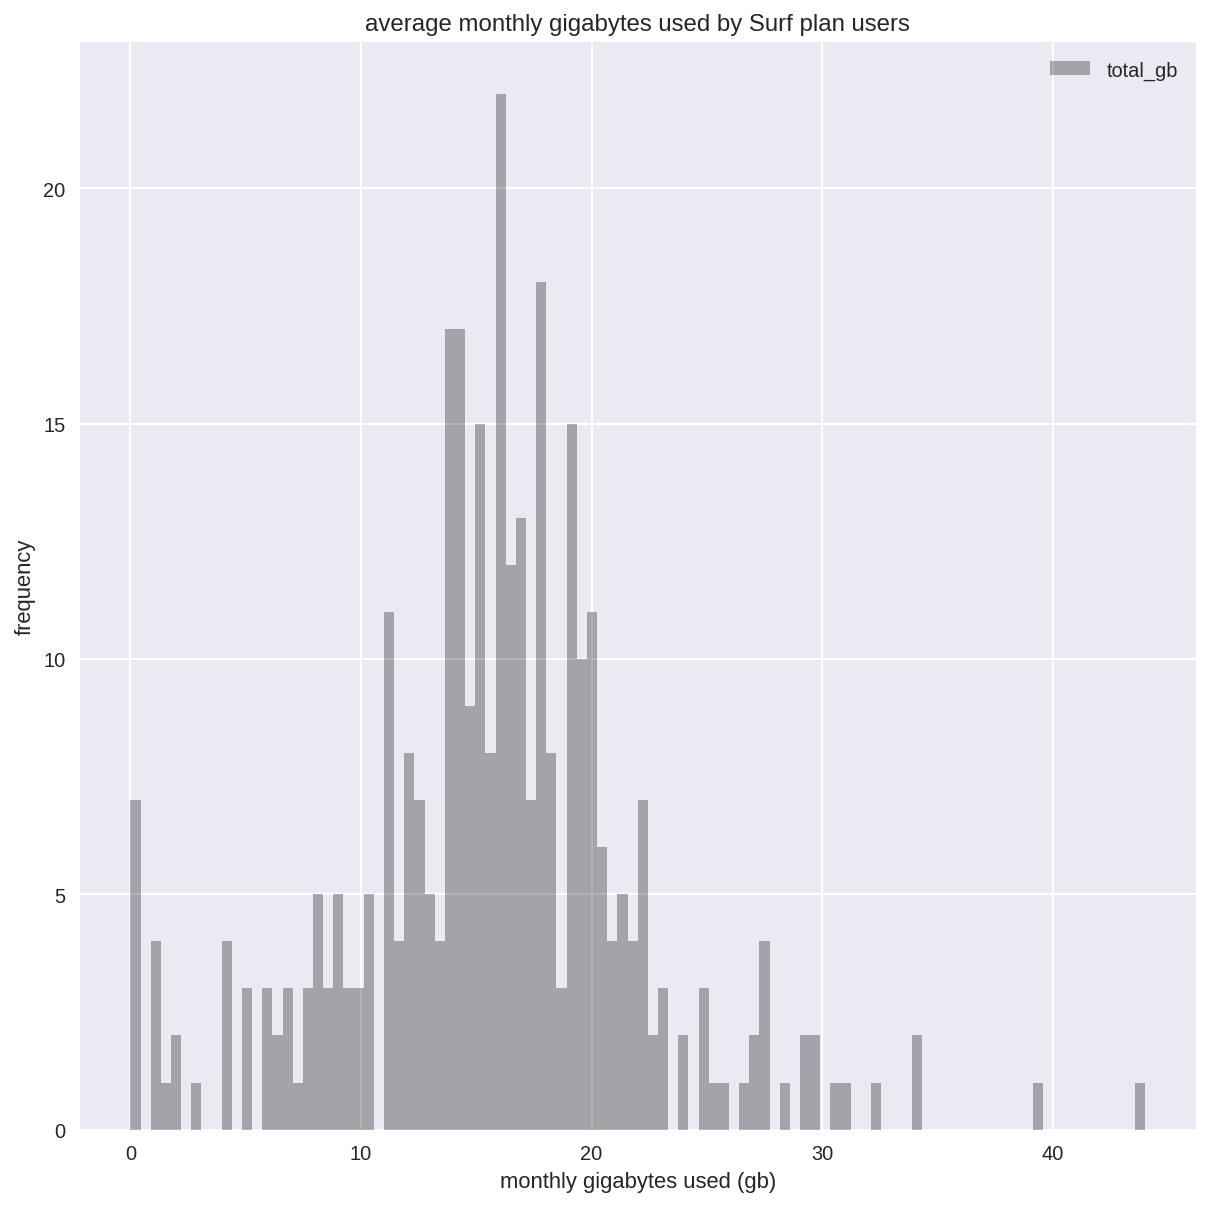

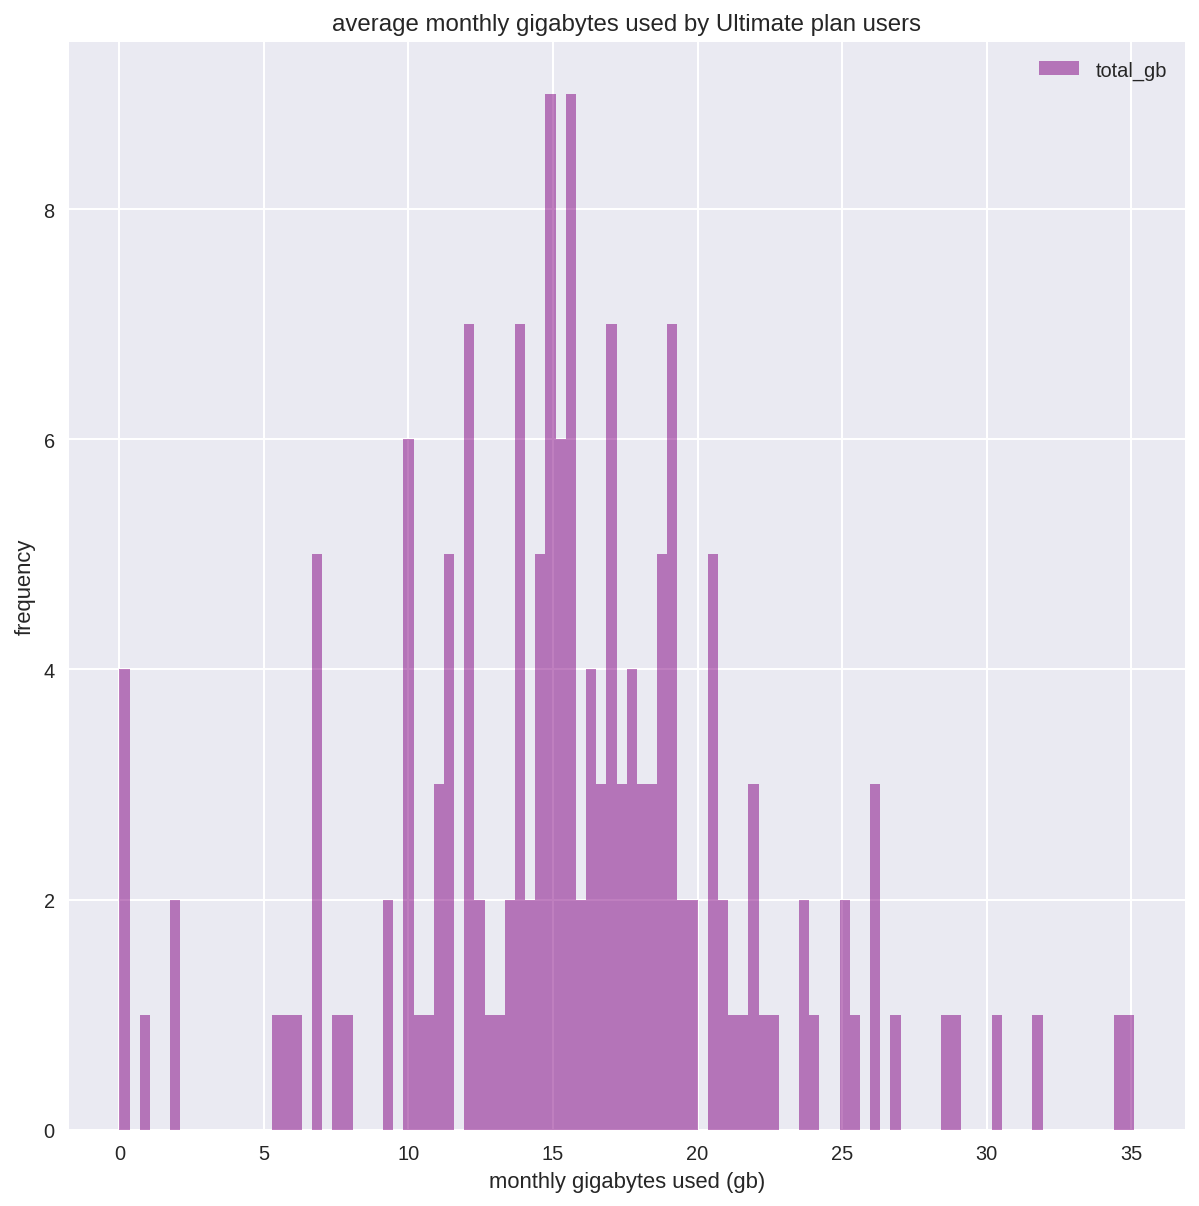

In [71]:
# Comparing the number of total gigabytes users of each plan require each month

users_info.query('plan=="surf"').pivot_table(index='user_id', values='total_gb').plot(
    kind='hist',figsize=(10,10), alpha=0.3, color='black', 
    label="ultimate",bins=100)

plt.ylabel('frequency')
plt.title('average monthly gigabytes used by Surf plan users')
plt.xlabel('monthly gigabytes used (gb)')


users_info.query('plan=="ultimate"').pivot_table(index='user_id', values='total_gb').plot(
    kind='hist',figsize=(10,10), alpha=0.5, color='purple', 
    label="ultimate",bins=100)
                            

plt.ylabel('frequency')
plt.title('average monthly gigabytes used by Ultimate plan users')
plt.xlabel('monthly gigabytes used (gb)')

In [72]:
surf_monthly_internet_avg=users_info.query('plan=="surf"').pivot_table(index='month',columns='plan', 
                       values='total_gb', aggfunc='mean')
surf_monthly_internet_avg.columns=['mean']


ult_monthly_internet_avg=users_info.query('plan=="ultimate"').pivot_table(index='month',columns='plan', 
                       values='total_gb', aggfunc='mean')
ult_monthly_internet_avg.columns=['mean']


print('surf plan mean(gigabytes) and variance(gigabytes**2)')

print('surf monthly gigabytes mean:          ',round(surf_monthly_internet_avg['mean'].mean().item(),2))
print('surf monthly gigabytes variance:      ',round(np.var(surf_monthly_internet_avg['mean']).item(),2),"\n")

print('ultimate plan mean(gigabytes) and variance(gigabytes**2)')
print('ultimate monthly gigabytes mean       ',round(ult_monthly_internet_avg['mean'].mean().item(),2))
print('ultimate monthly gigabytes variance   ',round(np.var(ult_monthly_internet_avg['mean']).item(),2))

surf plan mean(gigabytes) and variance(gigabytes**2)
surf monthly gigabytes mean:           14.5
surf monthly gigabytes variance:       11.61 

ultimate plan mean(gigabytes) and variance(gigabytes**2)
ultimate monthly gigabytes mean        16.22
ultimate monthly gigabytes variance    7.91


The boxplots for the average montly gigabytes for each plan are consistent with the histograms in that both distributions are negatively skewed. Surf and ultimate plans presented outlier with values of 5.00 and 7.25 gigabytes, respectively. The Surf plan had a slightly higher standard deviation with a value of 3.55 gb, compared to ultimate plan that presented a standard deviation value of 2.93 gb. In regards of interquantile range, the surf plan had a bigger IQR value than Ultimate plan. The surf plan presented an IQR value of 3.53 gb, while the Ultimate plan presented and IQR value of 1.05 gb. On average, the ultimate plan presented the greatest maximum value of gigabytes used with a value of 18.41 gb, compared to 17.90 gb for the surf plan.

            mean
count  12.000000
mean   14.499700
std     3.558253
min     5.000000
25%    13.229469
50%    15.792636
75%    16.748064
max    17.901235
IQR 3.52 gigabytes


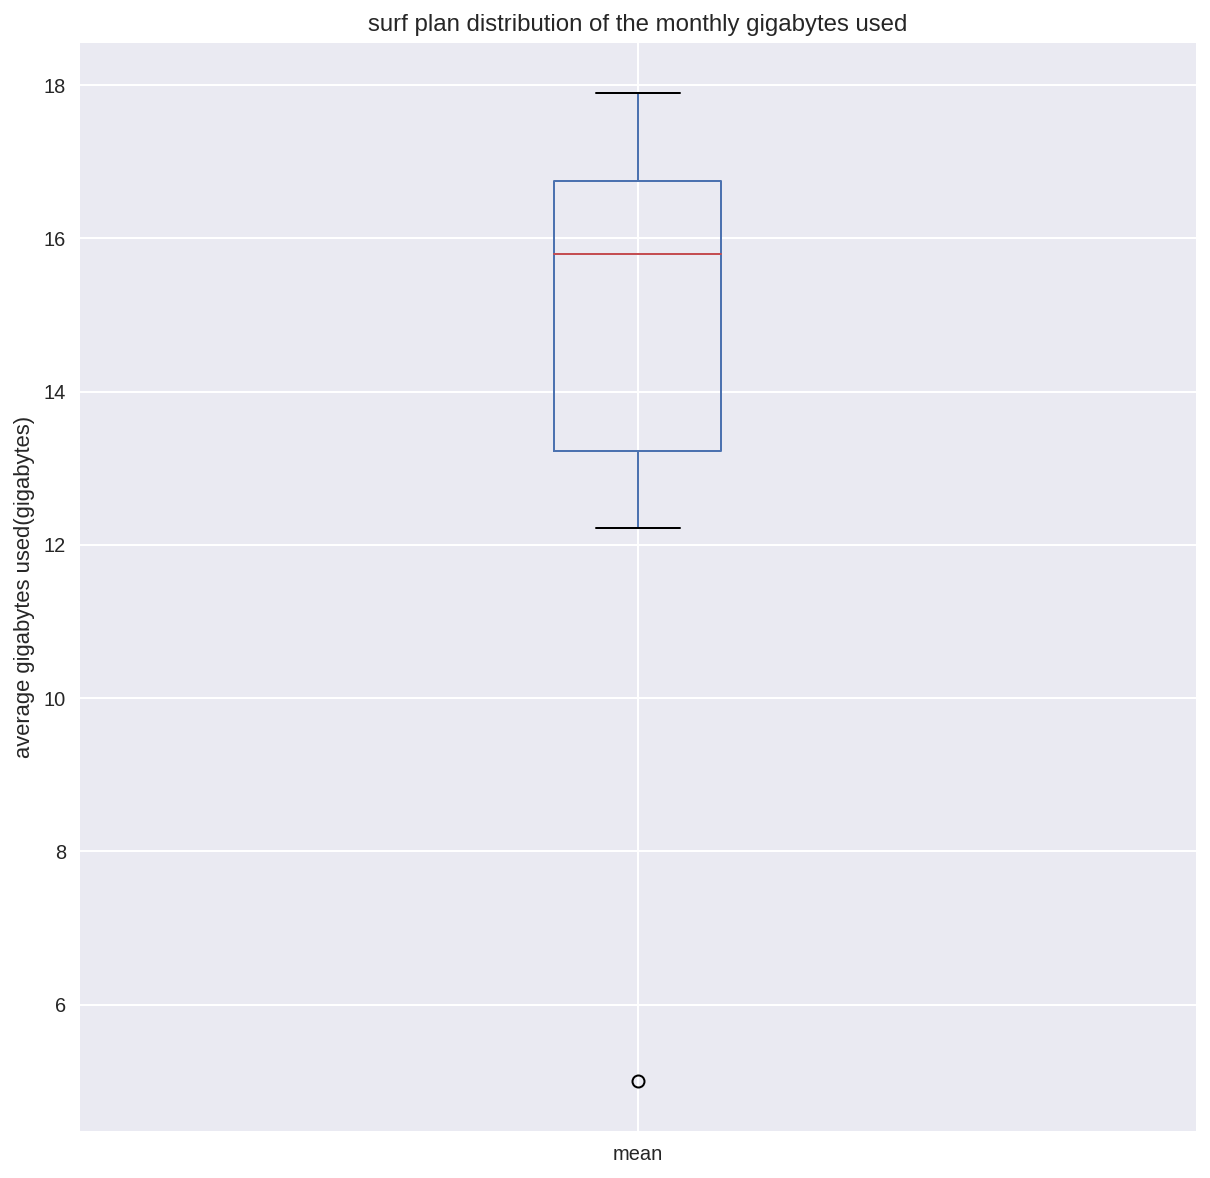

In [73]:
# Plot a boxplot to visualize the distribution of the monthly gigabytes used

surf_monthly_internet_avg.plot(kind='box', figsize=(10,10))
print(surf_monthly_internet_avg.describe())
plt.ylabel('average gigabytes used(gigabytes)')
plt.title('surf plan distribution of the monthly gigabytes used')
print('IQR', round((surf_monthly_internet_avg.quantile(0.75)-surf_monthly_internet_avg.quantile(0.25)).item(),2), 'gigabytes')

            mean
count  12.000000
mean   16.219408
std     2.938060
min     7.250000
25%    16.451977
50%    16.839080
75%    17.502934
max    18.416667
IQR 1.05 gigabytes


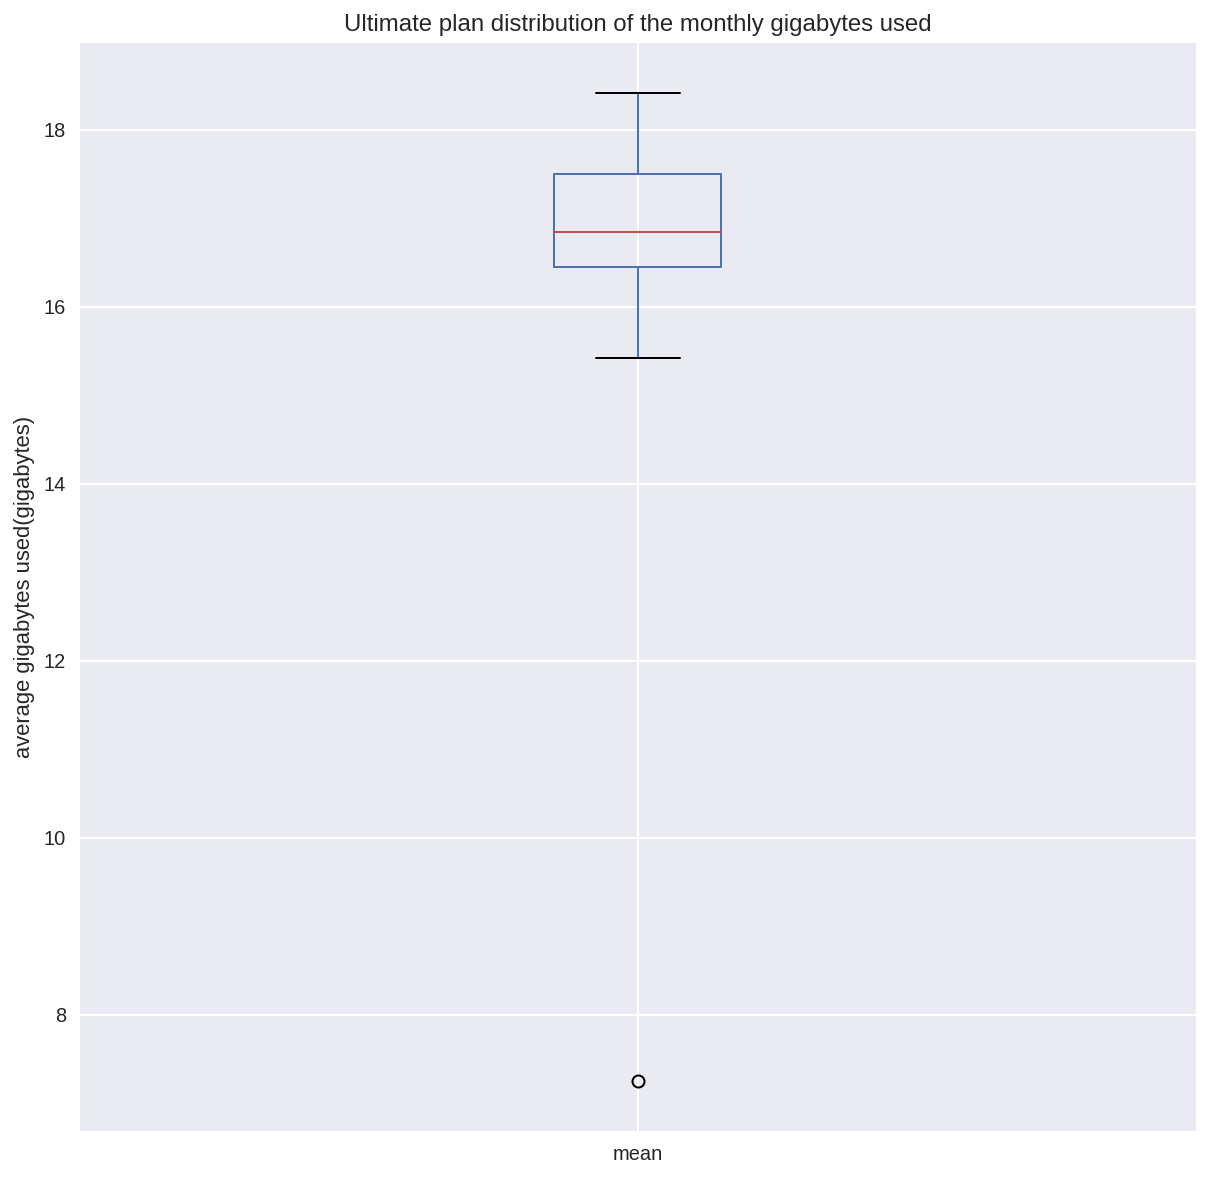

In [74]:
ult_monthly_internet_avg.plot(kind='box', figsize=(10,10))
print(ult_monthly_internet_avg.describe())
plt.ylabel('average gigabytes used(gigabytes)')
plt.title('Ultimate plan distribution of the monthly gigabytes used')
print('IQR', round((ult_monthly_internet_avg.quantile(0.75)-ult_monthly_internet_avg.quantile(0.25)).item(),2), 'gigabytes')

Below, we tested if the gigabytes used behavior differed between users of each plan. We tested for 95% statistical significance the hypotheses below: 
- H0: `mean of monthly gigabytes used of surf users equals the mean of monthly gigabytes used of ultimate users. `
- H1: `mean of monthly gigabytes used of surf users does not equal the mean of monthly gigabytes used of ultimate users. `
Based on the results of the t-test from the two independent samples, we conclude that we failed to reject null hypothesis for 95% statistical significance and conclude that we do not have enough evidence to conclude that monthly gigabytes used,on average, differs from surf and ultimate plans. 

In [75]:
#testing for users behaviors on gigabytes used monthly per plan.
alpha=0.05

results=st.ttest_ind(surf_monthly_internet_avg['mean'], ult_monthly_internet_avg['mean'])
                      
p_value= results.pvalue

print (p_value)

if results.pvalue < alpha :
    print ('we reject the null')
else:
    print ('we cannot reject the null')

0.210108692442139
we cannot reject the null


## Revenue

The bar plot below describes the average revenue(USD) by user per each plan, per each disticnt month. As we notice from the description of the plot, the top 3 months with the greatest average revenue in USD for Surf plan are December, October and August with means of 69.37, 64.82, and 63.43 USD, respectively. For the Ultimate plan, the top three months with the greatest means of revenue in USD are March, December, and April with mean values of 74.66, 73.20, and 73.00 USD, respectively. Surf had the smallest revenue in January with a value of 20 USD, while the Ultimate plan had the smallest revenue in february with a value of 70 USD. For surf and ultimate plans, the month that had the highest standard deviation, in USD, was December with a value of 67.54 and 14.40 USD, respectively. The months that had the smallest std for both plans were January with a value of 0.00 USD. 

Text(0.5, 1.0, 'Average revenue (USD) per each month, per plan ')

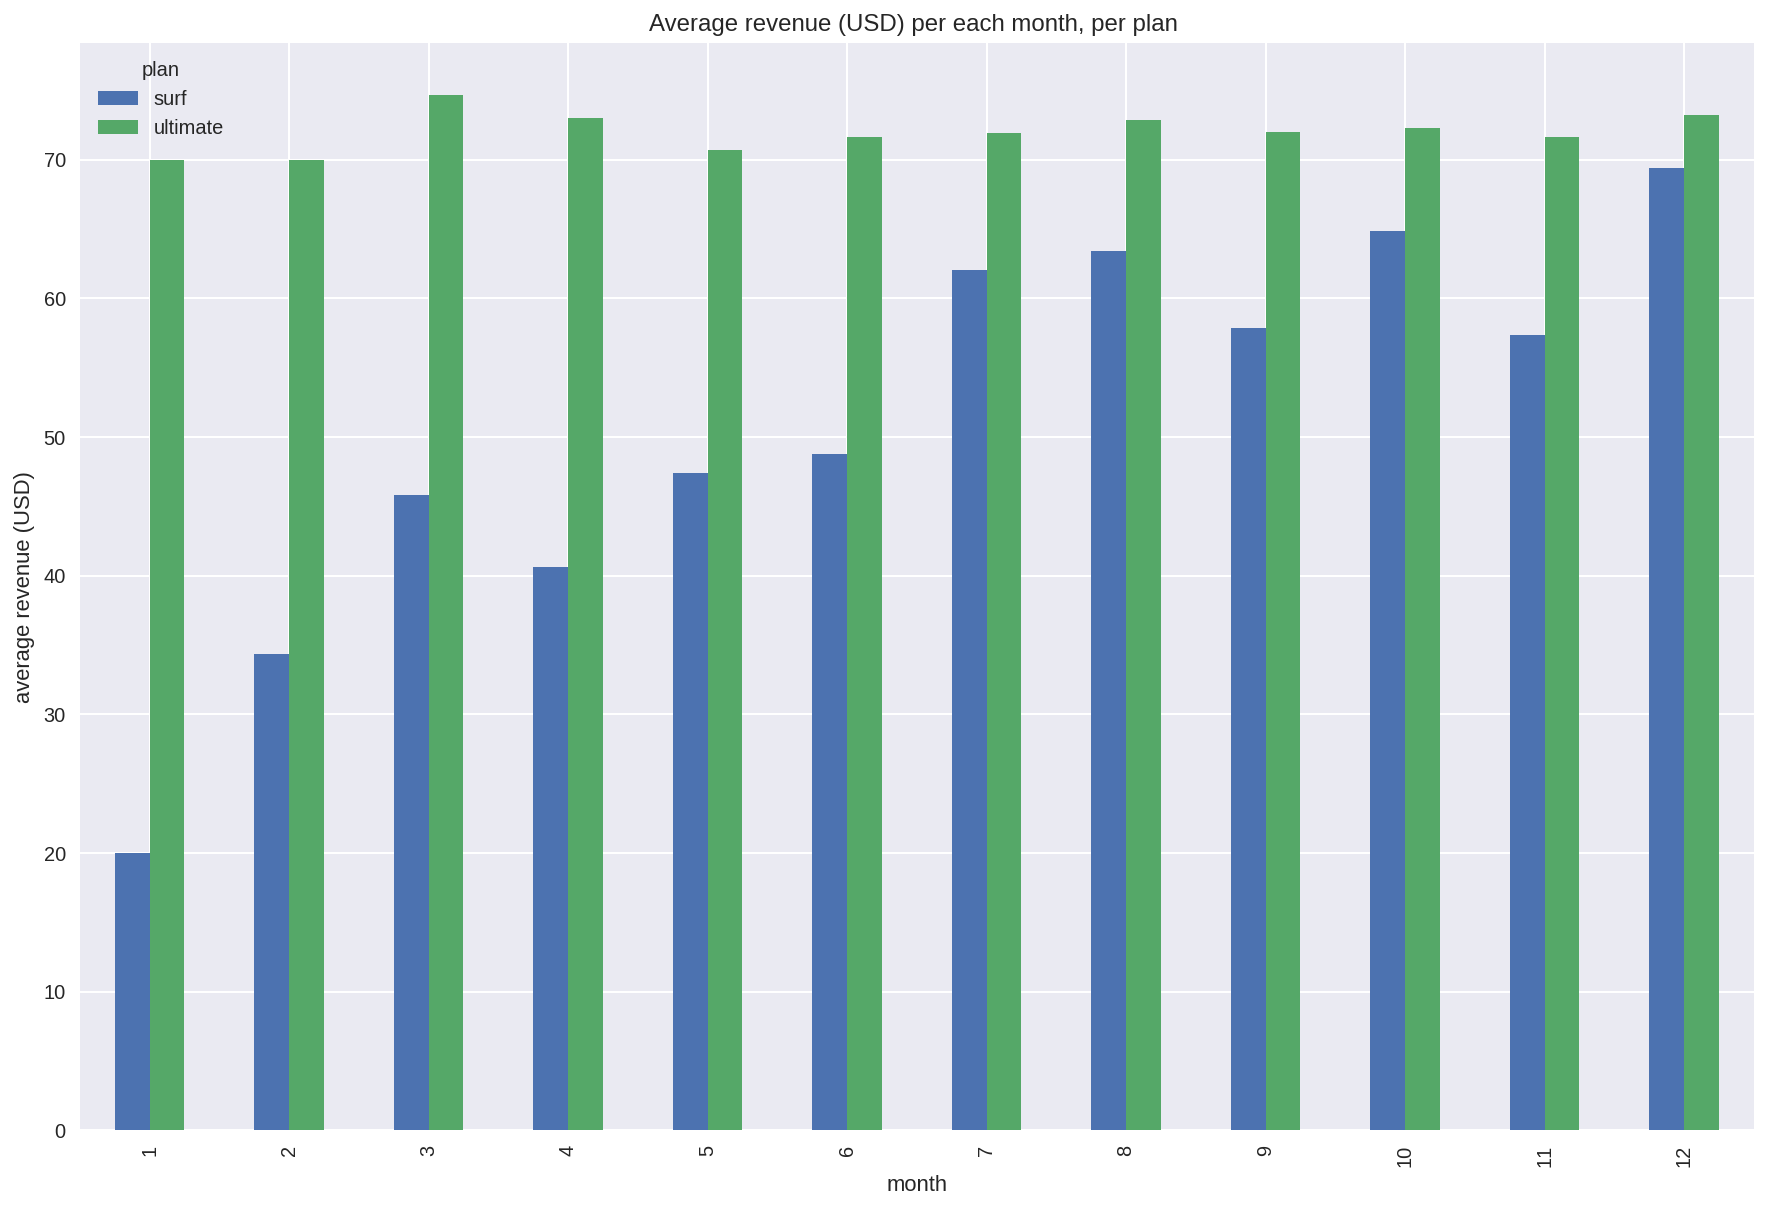

In [76]:
# Compare the revenue users of each plan tend to send each month


users_info.pivot_table(index='month',columns='plan', 
                       values='total_revenue', aggfunc='mean').plot(kind='bar', figsize=(15,10), grid=True)

plt.ylabel('average revenue (USD)')
plt.title('Average revenue (USD) per each month, per plan ')

In [77]:
surf_average_revenue=users_info.query('plan=="surf"').pivot_table(
    index='month',values='total_revenue', aggfunc=['min', 'median', 'mean', 'max', 'std'])
surf_average_revenue.columns= ['min', 'median', 'mean', 'max', 'std']


ultimate_average_revenue=users_info.query('plan=="ultimate"').pivot_table(
    index='month',values='total_revenue', aggfunc=['min', 'median', 'mean', 'max', 'std'])

ultimate_average_revenue.columns= ['min', 'median', 'mean', 'max', 'std']

print('Surf plan revenue per month description',"\n")
print(surf_average_revenue.sort_values('std', ascending=False), "\n")
print('Ultimate plan revenue per month description',"\n")
print(ultimate_average_revenue.sort_values('std', ascending=False))

Surf plan revenue per month description 

       min  median       mean  max        std
month                                        
12      20      50  69.370370  590  67.545090
8       20      41  63.435583  380  59.730985
10      20      50  64.824268  330  56.403879
7       20      40  62.065574  260  54.111262
11      20      40  57.374126  290  49.783143
9       20      40  57.856410  240  47.440575
6       20      30  48.775510  240  44.401758
5       20      21  47.402597  231  44.193135
3       20      20  45.826087  170  38.846612
4       20      20  40.600000  150  34.595623
2       20      29  34.333333   70  20.712315
1       20      20  20.000000   20   0.000000 

Ultimate plan revenue per month description 

       min  median       mean  max        std
month                                        
12      70      70  73.206452  182  14.408555
10      70      70  72.268519  182  12.904832
8       70      70  72.859155  140  12.442204
3       70      70  74.666667  112  

The plots below show the total revenue users of each plan obtained each month. The purple colored histogram represents the ultimate plan, and the black colored histogram represents the surf plan. The average monthly revenue from users of Surf plan was 50.99 USD, and the variance was 190.41 USD^2. The average monthly revenue from users of Ultimate plan was 71.99 USD and the variance was 1.69 USD^2. 

Text(0.5, 0, 'monthly revenue (USD)')

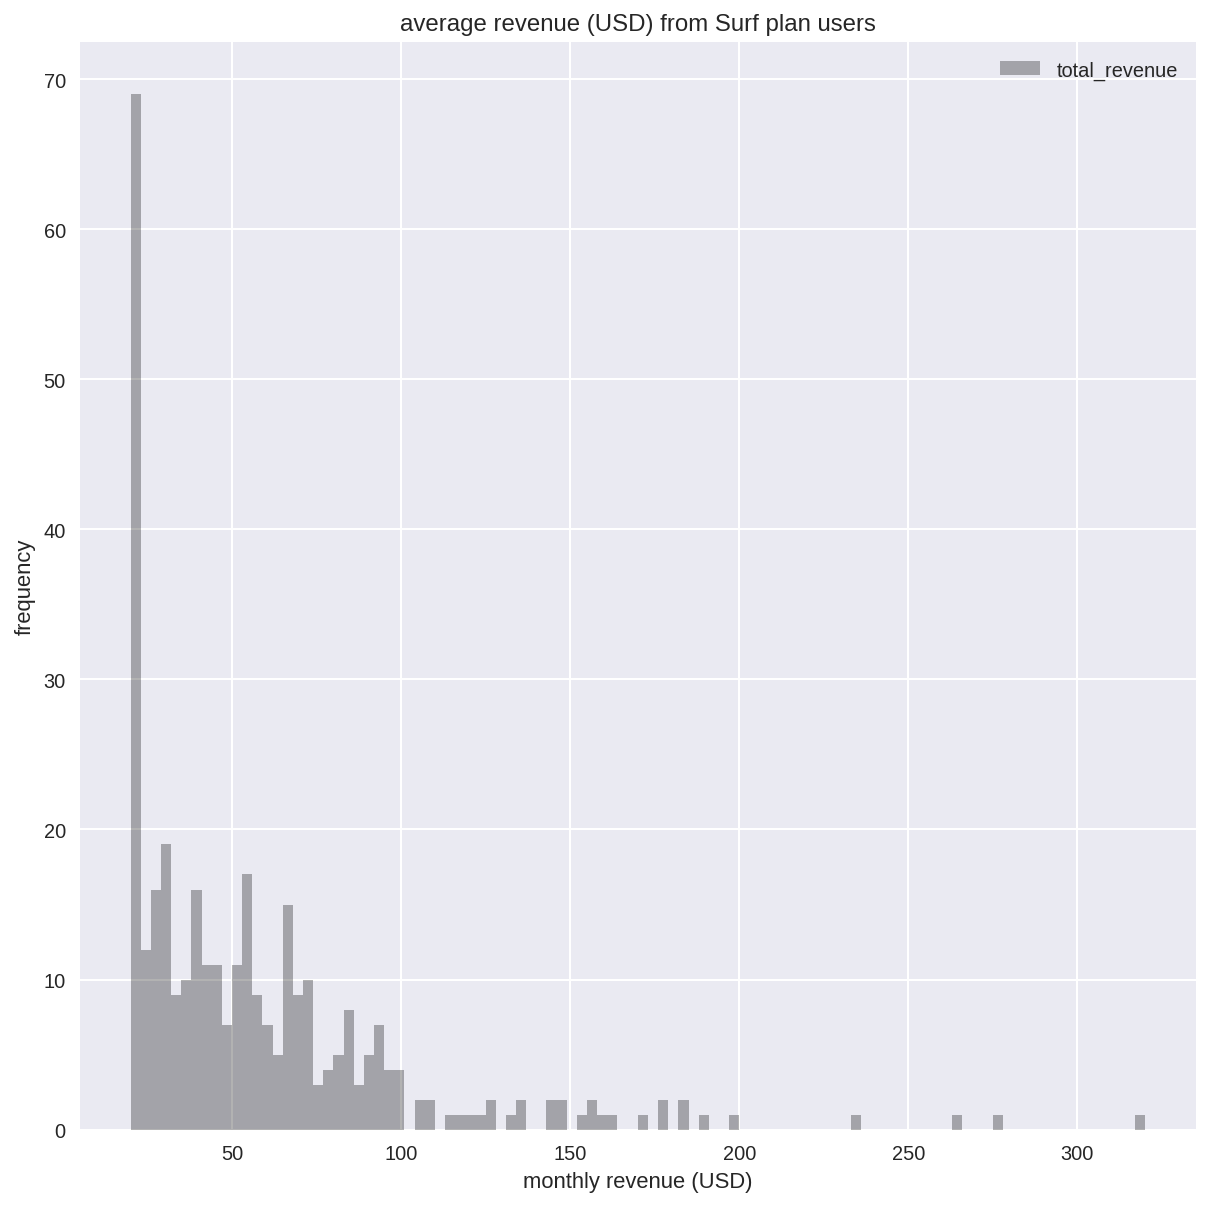

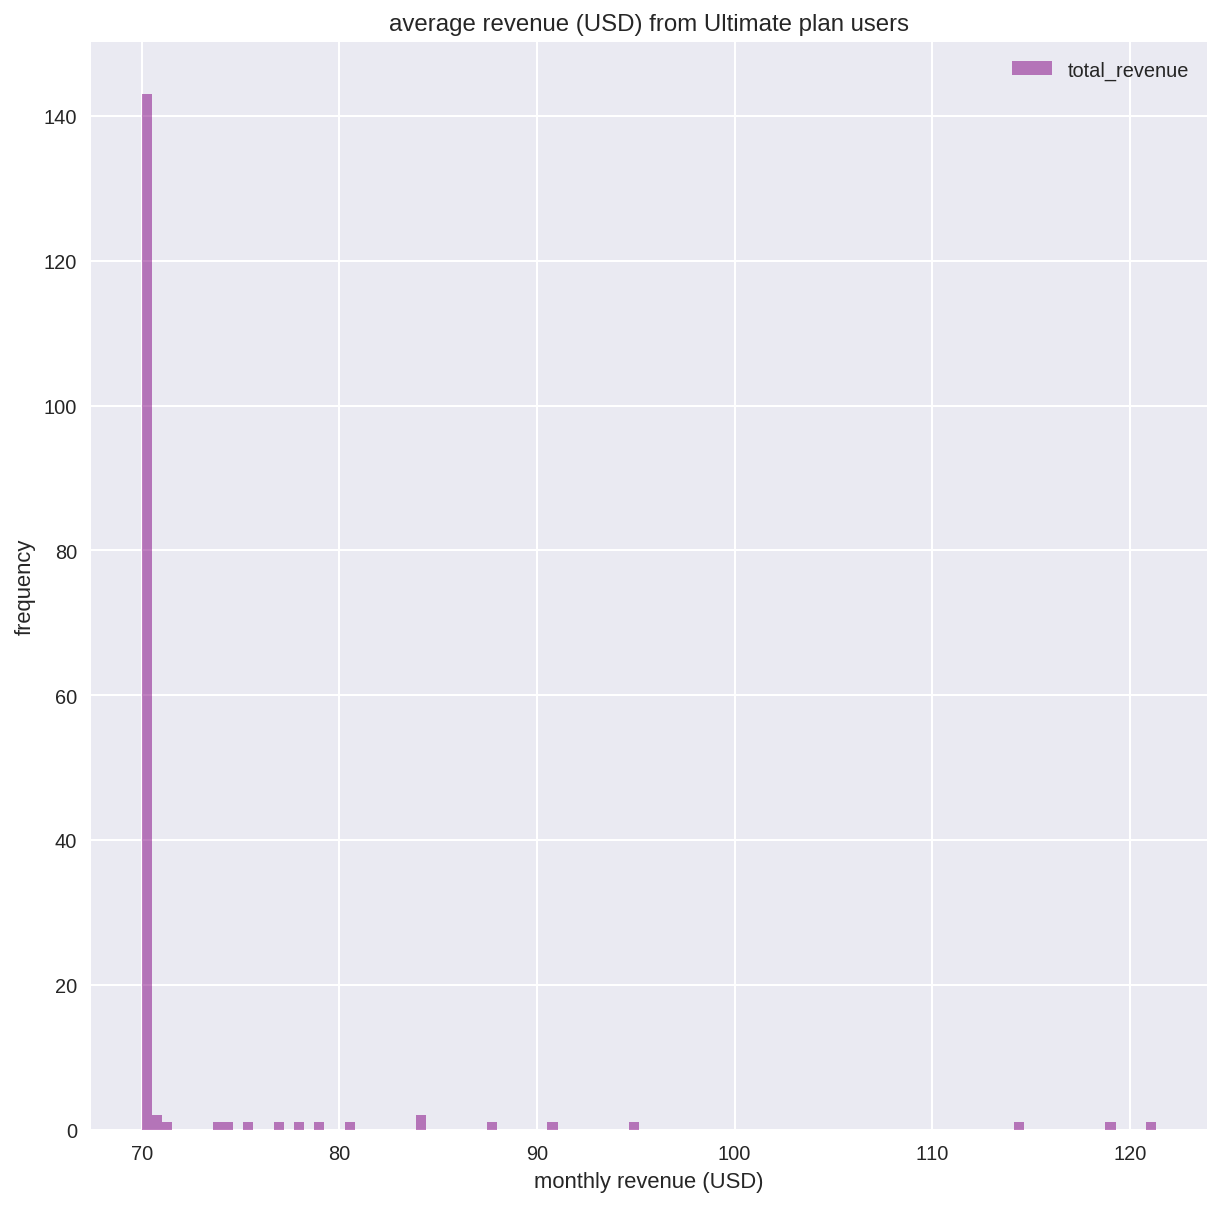

In [78]:
# Comparing the number of total revenue users of each plan obtained each month

users_info.query('plan=="surf"').pivot_table(index='user_id', values='total_revenue').plot(
    kind='hist',figsize=(10,10), alpha=0.3, color='black', 
    label="surf",bins=100)

plt.ylabel('frequency')
plt.title('average revenue (USD) from Surf plan users')
plt.xlabel('monthly revenue (USD)')


users_info.query('plan=="ultimate"').pivot_table(index='user_id', values='total_revenue').plot(
    kind='hist',figsize=(10,10), alpha=0.5, color='purple', 
    label="ultimate",bins=100)
                            

plt.ylabel('frequency')
plt.title('average revenue (USD) from Ultimate plan users')
plt.xlabel('monthly revenue (USD)')

In [79]:
surf_monthly_revenue_avg=users_info.query('plan=="surf"').pivot_table(index='month',columns='plan', 
                       values='total_revenue', aggfunc='mean')
surf_monthly_revenue_avg.columns=['mean']


ult_monthly_revenue_avg=users_info.query('plan=="ultimate"').pivot_table(index='month',columns='plan', 
                       values='total_revenue', aggfunc='mean')
ult_monthly_revenue_avg.columns=['mean']


print('surf plan mean (USD) and revenue(USD**2)')

print('surf monthly revenue mean:          ',round(surf_monthly_revenue_avg['mean'].mean().item(),2))
print('surf monthly revenue variance:      ',round(np.var(surf_monthly_revenue_avg['mean']).item(),2),"\n")

print('ultimate plan mean (USD) and variance(USD**2)')
print('ultimate monthly revenue mean       ',round(ult_monthly_revenue_avg['mean'].mean().item(),2))
print('ultimate monthly revenue variance   ',round(np.var(ult_monthly_revenue_avg['mean']).item(),2))

surf plan mean (USD) and revenue(USD**2)
surf monthly revenue mean:           50.99
surf monthly revenue variance:       190.41 

ultimate plan mean (USD) and variance(USD**2)
ultimate monthly revenue mean        71.99
ultimate monthly revenue variance    1.69


The boxplots for the average montly revenue for each plan are consistent with the histograms in that both distributions are positively skewed. Surf and ultimate plans presented outliers greater than 1.5 IQR. The Surf plan had a higher standard deviation with a value of 55.21 USD, compared to ultimate plan that presented a standard deviation value of 11.31 USD. In regards of interquantile range, the surf plan had a bigger IQR value than Ultimate plan. The surf plan presented an IQR value of 60.0, while the Ultimate plan presented and IQR value of 0.00 USD. On average, the surf plan presented the greatest maximum value of revenue with a value of 590 USD, compared to 182.00 USD for the surf plan.

            mean
count  12.000000
mean   50.988655
std    14.412452
min    20.000000
25%    44.519565
50%    53.074818
75%    62.408076
max    69.370370


Text(0.5, 1.0, 'surf plan distribution of the monthly revenue(USD)')

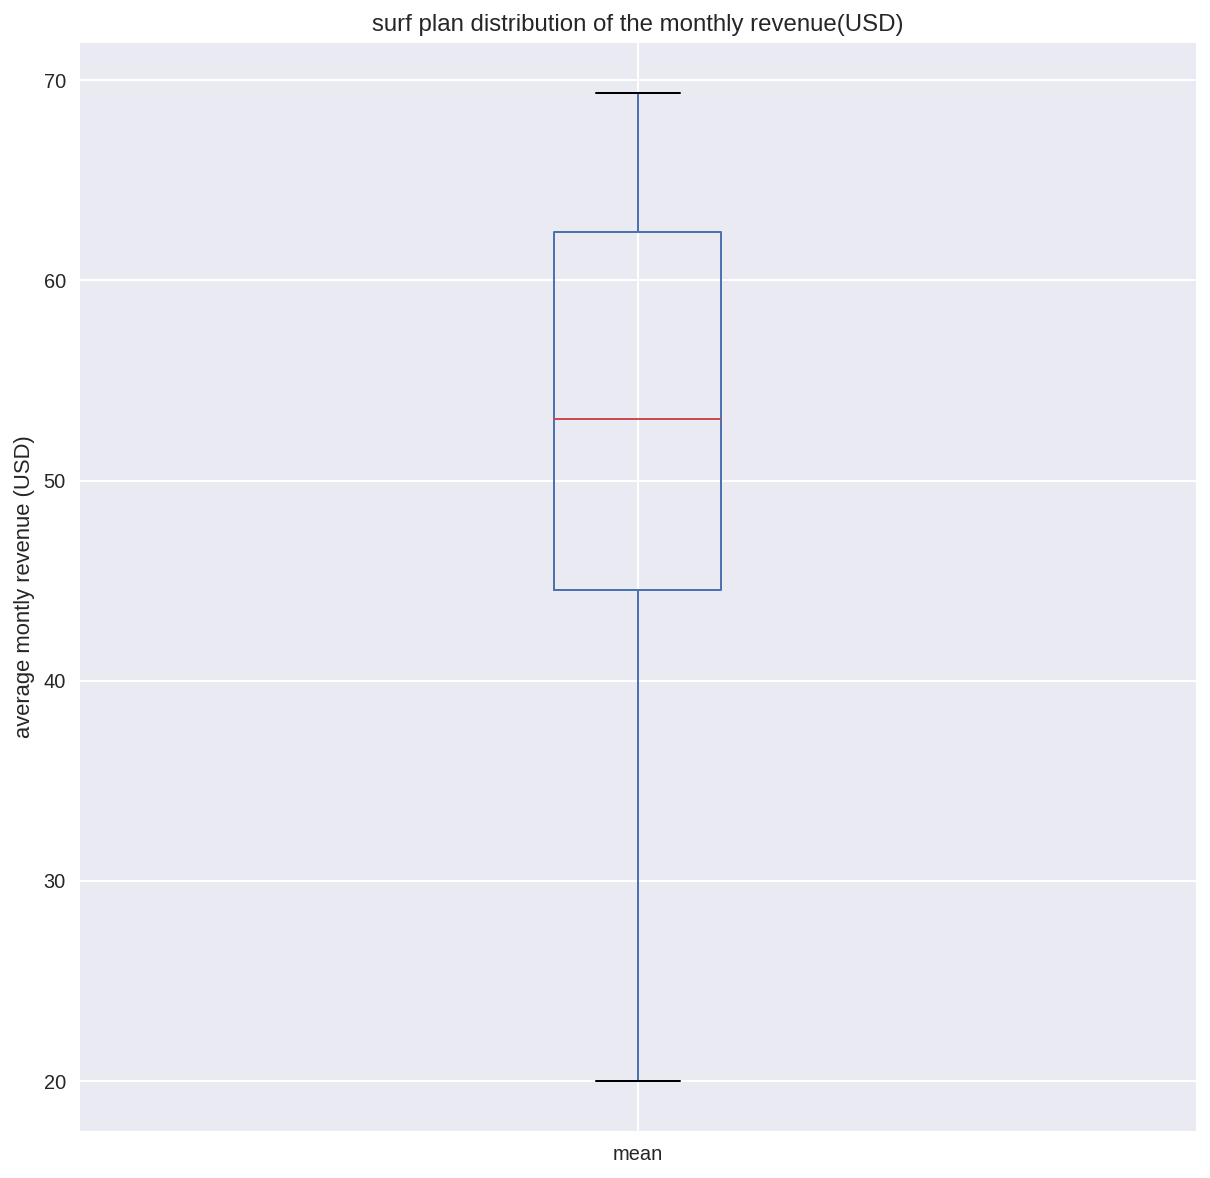

In [80]:
# Plot a boxplot to visualize the distribution of the monthly revenue

surf_monthly_revenue_avg.plot(kind='box', figsize=(10,10))
print(surf_monthly_revenue_avg.describe())
plt.ylabel('average montly revenue (USD)')
plt.title('surf plan distribution of the monthly revenue(USD)')

            mean
count  12.000000
mean   71.994126
std     1.357257
min    70.000000
25%    71.409758
50%    71.954900
75%    72.894366
max    74.666667


Text(0.5, 1.0, 'ultimate plan distribution of the monthly revenue(USD)')

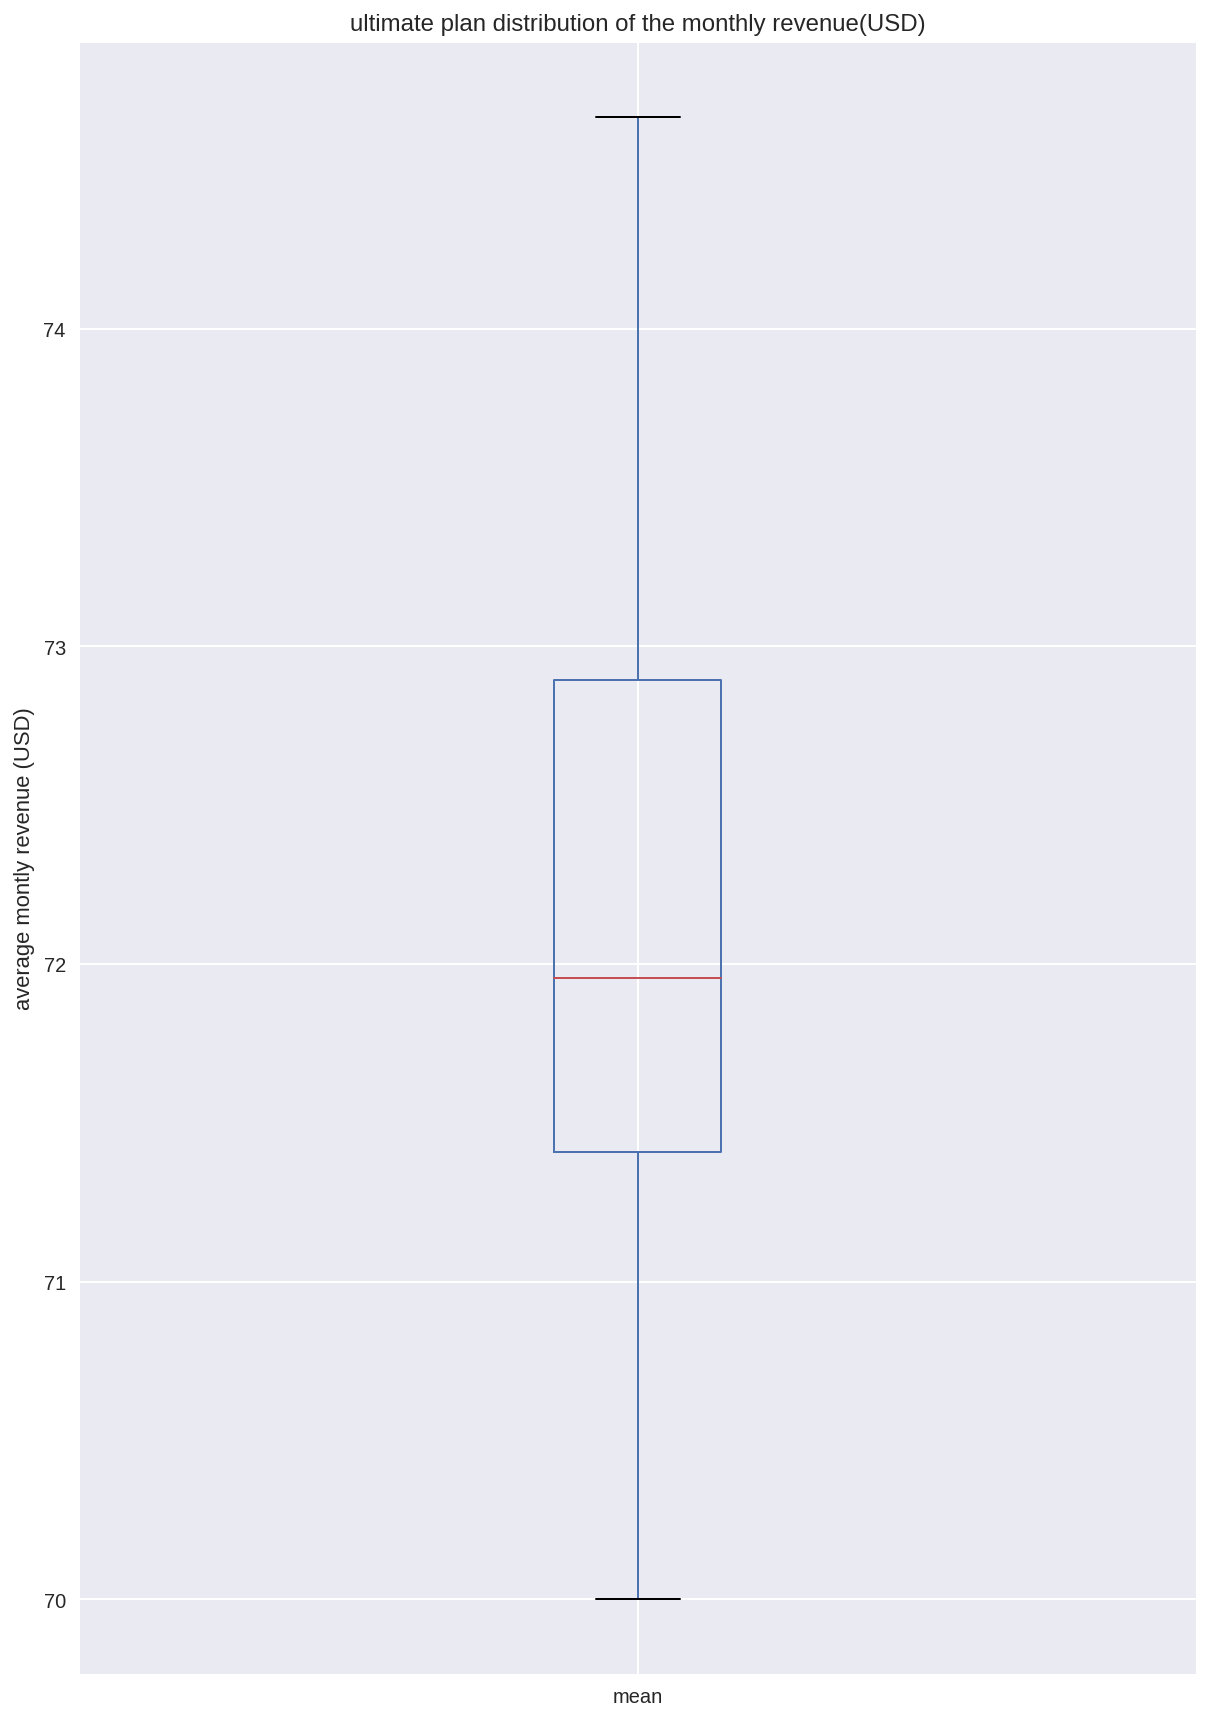

In [81]:
ult_monthly_revenue_avg.plot(kind='box', figsize=(10,15))
print(ult_monthly_revenue_avg.describe())
plt.ylabel('average montly revenue (USD)')
plt.title('ultimate plan distribution of the monthly revenue(USD)')

Section 1.13 tests the statistical hypothesis about the means of monthly revenue for each plan. 

## Test statistical hypotheses

Below, we tested if the revenue means differed between users of each plan. We tested for 95% statistical significance the null hypothesis and alternative hypothesis, below:

- __Null hypothesis:__  `mean of monthly revenue from surf users equals the mean of monthly revenue from ultimate users.` 
- __Alternative hypothesis__ : `mean of monthly revenue for ultimate users is greater than mean of montly revenue from surf users`

Based on the results of the t-test from the two independent samples, we conclude that we rejected the null hypothesis for 95% statistical significance, and conclude that Ultimate plan brings more revenue, on average montly, than Surf plan. 

In [82]:
# Test the hypotheses


alpha=0.05

results=st.ttest_ind(ult_monthly_revenue_avg['mean'], surf_monthly_revenue_avg['mean'])
p_value= results.pvalue

print (p_value)

if results.pvalue < alpha and ult_monthly_revenue_avg['mean'].mean()>surf_monthly_revenue_avg['mean'].mean():
    print ('we reject the null')
else:
    print ('we cannot reject the null')

4.9407765593432925e-05
we reject the null



The folowing section illustrates the statistical analysis to test whether users from New York-New Jersey area pay, on average, more than residents from other area. The monthly distribution of revenue for the Ny-Nj region users had a mean of 52.28 USD and variance of 14.18 USD^2, while non-NY-NJ region users had a mean of 61.23 USD and variance of 6.41 USD^2. 

In [83]:
#distribution of monthly revenue from NY-NJ region and non-NY-NJ region users 

nynj_users=users_data[
    (users_data['city'].str.contains('NY')) | (users_data['city'].str.contains('NJ')) ]['user_id'].to_list()

non_nynj_users=users_data.query('user_id not in @nynj_users')['user_id'].to_list()

nynj_revenue=users_info.query('user_id in @nynj_users')
nynj_monthly_revenue=nynj_revenue.pivot_table(index='month', values='total_revenue', 
                                              aggfunc=['min','median','mean','max', 'std'])
nynj_monthly_revenue.columns=['min','median', 'mean', 'max', 'std']



non_nynj_revenue=users_info.query('user_id in @non_nynj_users')
non_nynj_monthly_revenue=non_nynj_revenue.pivot_table(index='month', values='total_revenue', 
                                                      aggfunc=['min','median','mean','max', 'std'])
non_nynj_monthly_revenue.columns=['min','median', 'mean', 'max', 'std']

print('distribution of average revenue per each month from users in NY and NJ area', "\n")
print(nynj_monthly_revenue, "\n")
print('distribution of average revenue per each month from users not in NY and NJ area', "\n")
print(non_nynj_monthly_revenue)


distribution of average revenue per each month from users in NY and NJ area 

       min  median       mean  max        std
month                                        
1       20    20.0  20.000000   20        NaN
2       20    45.0  45.000000   70  28.867513
3       20    20.0  44.222222  112  35.601186
4       20    20.0  43.117647  119  34.519709
5       20    22.0  47.238095  108  32.652572
6       20    21.5  46.766667  160  37.396923
7       20    45.0  56.150000  201  42.521518
8       20    60.5  60.096154  213  41.425227
9       20    53.0  61.507937  200  43.726375
10      20    62.0  72.027778  273  55.354675
11      20    70.0  67.341463  230  50.901798
12      20    60.0  63.919192  280  44.473720 

distribution of average revenue per each month from users not in NY and NJ area 

       min  median       mean  max        std
month                                        
1       20      70  60.000000   70  22.360680
2       20      70  51.583333   70  22.984019
3       20

In [84]:
print('NY-NJ users montly mean revenue(USD)',nynj_monthly_revenue['mean'].mean())
print('NY-NJ users montly varaince revenue(USD^2)',nynj_monthly_revenue['mean'].std())


print('non-NY-NJ users montly mean revenue(USD)',non_nynj_monthly_revenue['mean'].mean())
print('non-NY-NJ users montly variance revenue(USD^2)',non_nynj_monthly_revenue['mean'].std())

NY-NJ users montly mean revenue(USD) 52.28226288762516
NY-NJ users montly varaince revenue(USD^2) 14.18452437688619
non-NY-NJ users montly mean revenue(USD) 61.2346937381084
non-NY-NJ users montly variance revenue(USD^2) 6.419311761447037


Below, we tested if the revenue means differed between users from NY-NJ area to users from other regions. We tested for 95% statistical significance the null hypothesis and alternative hypothesis, below:

- __Null hypothesis:__  `mean of monthly revenue from NY-NY area users equals the mean of monthly revenue from users of other regions.` 
- __Alternative hypothesis__ : `mean of monthly revenue for NY-NJ area users is greater than mean of montly revenue from users of other regions`

Based on the results of the t-test from the two independent samples, we conclude that we failed to reject null hypothesis for 95% statistical significance and that we do not have enough evidence to conclude that residents from the NY-NJ region pay more, on monthly average, than users from other regions. 

In [85]:

alpha=0.05

results=st.ttest_ind(nynj_monthly_revenue['mean'], non_nynj_monthly_revenue['mean'])
p_value= results.pvalue

print (p_value)
if results.pvalue < alpha and nynj_monthly_revenue['mean'].mean()>non_nynj_monthly_revenue['mean'].mean():
    print ('we reject the null')
else:
    print ('we cannot reject the null')
    


0.058943379416729065
we cannot reject the null


## General conclusion

Based on the statistical analysis, we conclude that there was not enough evidence on 95% statistical confidence that showed a difference between the users of each plan's behaviors on the number of call minutes they used monthly; the number of messages they sent monthly; and the number of gigabytes they used monthly. However, we had enough evidence on 95% statistical confidence to conclude that the ultimate plan brough more reveneue, on monthly average, than surf plan. Lastly, we did not have enough evidence, on 95% statistical confidence, to conclude that users from the NY-NJ are, on montly average, paid more than other users. 
